In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set(rc={'figure.figsize':(15,8)})

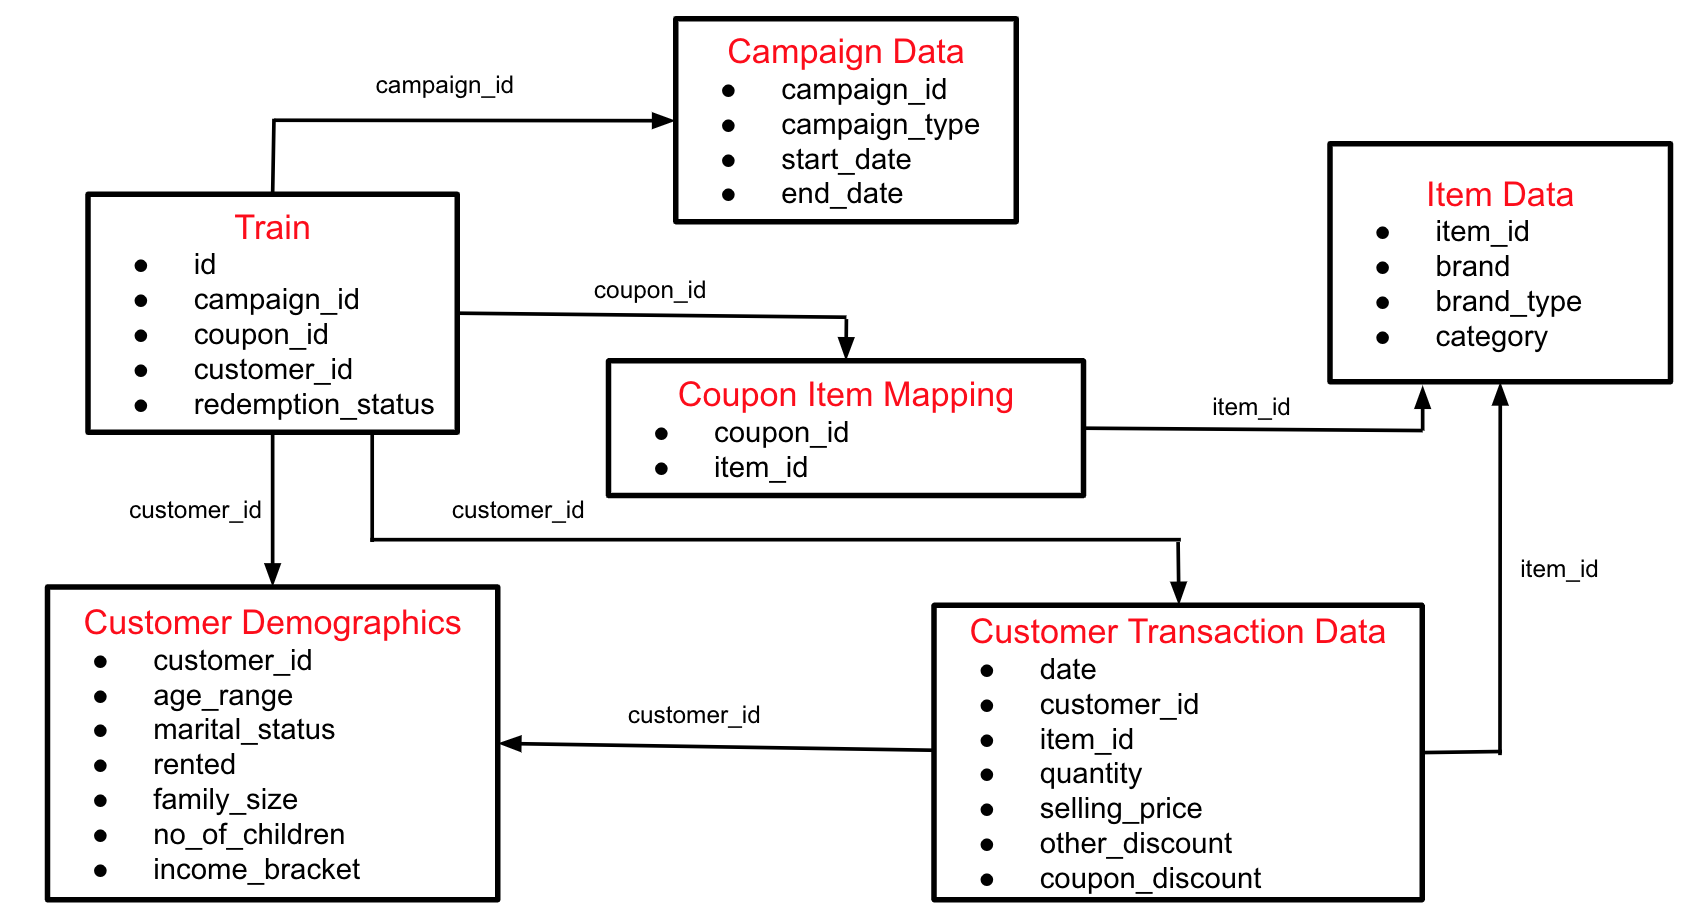

<h1> Problem Definition: </h1>

  <font color='green'> Predicting Coupon Redemption
XYZ Credit Card company regularly helps its merchants understand their data better and take key business decisions accurately by providing machine learning and analytics consulting. ABC is an established Brick & Mortar retailer that frequently conducts marketing campaigns for its diverse product range. As a merchant of XYZ, they have sought XYZ to assist them in their discount marketing process using the power of machine learning.Discount marketing and coupon usage are very widely used promotional techniques to attract new customers and to retain & reinforce loyalty of existing customers. The measurement of a consumer’s propensity towards coupon usage and the prediction of the redemption behaviour are crucial parameters in assessing the effectiveness of a marketing campaign.ABC promotions are shared across various channels including email, notifications, etc. A number of these campaigns include coupon discounts that are offered for a specific product/range of products. The retailer would like the ability to predict whether customers redeem the coupons received across channels, which will enable the retailer’s marketing team to accurately design coupon construct, and develop more precise and targeted marketing strategies.
https://www.kaggle.com/datasets/vasudeva009/predicting-coupon-redemption?select=train.csv
            </font>

In [4]:
'''
columns(Features):-

id= Unique id for coupon customer impression
campaign_id= Unique id for a discount campaign
coupon_id= Unique id for a discount coupon
customer_id= Unique id for a customer
redemption_status= (target) (0 - Coupon not redeemed, 1 - Coupon redeemed)
campaign_id= Unique id for a discount campaign
campaign_type= Anonymised Campaign Type (X/Y)
start_date= Campaign Start Date
end_date= Campaign End Date
coupon_id= Unique id for a discount coupon (no order)
item_id= Unique id for items for which given coupon is valid (no order)
customer_id= Unique id for a customer
age_range= Age range of customer family in years
marital_status= Married/Single
rented= 0 - not rented accommodation, 1 - rented accommodation
family_size= Number of family members
noofchildren= Number of children in the family
income_bracket= Label Encoded Income Bracket (Higher income corresponds to higher number)
date=  Date of Transaction
customer_id=  Unique id for a customer
item_id=  Unique id for item
quantity=  quantity of item bought
selling_price=  Sales value of the transaction with discounts
other_discount=  Discount from other sources such as manufacturer coupon/loyalty card
coupon_discount= Discount availed from retailer coupon
item_id=  Unique id for itemv
brand=  Unique id for item brand
brand_type=  Brand Type (local/Established)
category=  Item Category




'''

'\ncolumns(Features):-\n\nid= Unique id for coupon customer impression\ncampaign_id= Unique id for a discount campaign\ncoupon_id= Unique id for a discount coupon\ncustomer_id= Unique id for a customer\nredemption_status= (target) (0 - Coupon not redeemed, 1 - Coupon redeemed)\ncampaign_id= Unique id for a discount campaign\ncampaign_type= Anonymised Campaign Type (X/Y)\nstart_date= Campaign Start Date\nend_date= Campaign End Date\ncoupon_id= Unique id for a discount coupon (no order)\nitem_id= Unique id for items for which given coupon is valid (no order)\ncustomer_id= Unique id for a customer\nage_range= Age range of customer family in years\nmarital_status= Married/Single\nrented= 0 - not rented accommodation, 1 - rented accommodation\nfamily_size= Number of family members\nnoofchildren= Number of children in the family\nincome_bracket= Label Encoded Income Bracket (Higher income corresponds to higher number)\ndate=  Date of Transaction\ncustomer_id=  Unique id for a customer\nitem_

## Data collecting

In [5]:
train=pd.read_csv('train.csv')
customer_transaction=pd.read_csv('customer_transaction_data.csv')
coupon_item_mapping=pd.read_csv('coupon_item_mapping.csv')
customer_demographics=pd.read_csv('customer_demographics.csv')
campagin_data=pd.read_csv('campaign_data.csv')
item_data=pd.read_csv('item_data.csv')

In [6]:
df_1=pd.merge(train,customer_demographics,how='inner', on='customer_id')
df_1=pd.merge(df_1,campagin_data,how='inner', on='campaign_id')
df_1.isnull().mean()*100

id                    0.000000
campaign_id           0.000000
coupon_id             0.000000
customer_id           0.000000
redemption_status     0.000000
age_range             0.000000
marital_status       41.838254
rented                0.000000
family_size           0.000000
no_of_children       67.806509
income_bracket        0.000000
campaign_type         0.000000
start_date            0.000000
end_date              0.000000
dtype: float64

In [7]:
df_2=pd.merge(customer_transaction,item_data, on='item_id')

In [8]:
df_2.isnull().mean()*100

date               0.0
customer_id        0.0
item_id            0.0
quantity           0.0
selling_price      0.0
other_discount     0.0
coupon_discount    0.0
brand              0.0
brand_type         0.0
category           0.0
dtype: float64

In [9]:
customer_demographics.isnull().mean()*100

customer_id        0.000000
age_range          0.000000
marital_status    43.289474
rented             0.000000
family_size        0.000000
no_of_children    70.789474
income_bracket     0.000000
dtype: float64

In [10]:
## because that the dataset is so big i took a sample of 10000 customers to study on 
df1=pd.merge(df_1,df_2.sample(10000, random_state=45),on='customer_id')

In [11]:
df1.to_csv('Customers_coupon_prediction_dataset.csv')

In [12]:
## we still got the approx same percentage of null values so we took a good sample of 10 000 customers
df1.isnull().mean()*100

id                    0.000000
campaign_id           0.000000
coupon_id             0.000000
customer_id           0.000000
redemption_status     0.000000
age_range             0.000000
marital_status       40.322106
rented                0.000000
family_size           0.000000
no_of_children       63.599907
income_bracket        0.000000
campaign_type         0.000000
start_date            0.000000
end_date              0.000000
date                  0.000000
item_id               0.000000
quantity              0.000000
selling_price         0.000000
other_discount        0.000000
coupon_discount       0.000000
brand                 0.000000
brand_type            0.000000
category              0.000000
dtype: float64

## Done with collecting !

# <font color='red'>Let's Start Analysis </font>

In [13]:
df1=pd.read_csv('Customers_coupon_prediction_dataset.csv', index_col=0)
df=df1.copy()

In [14]:
df

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,...,end_date,date,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,13,27,1053,0,46-55,NaN,0,1,NaN,...,05/07/13,2013-06-11,12795,1,42.39,0.00,0.0,56,Local,Grocery
1,1,13,27,1053,0,46-55,NaN,0,1,NaN,...,05/07/13,2012-06-24,45009,1,71.24,-35.26,0.0,56,Local,Natural Products
2,2444,13,513,1053,0,46-55,NaN,0,1,NaN,...,05/07/13,2013-06-11,12795,1,42.39,0.00,0.0,56,Local,Grocery
3,2444,13,513,1053,0,46-55,NaN,0,1,NaN,...,05/07/13,2012-06-24,45009,1,71.24,-35.26,0.0,56,Local,Natural Products
4,3651,13,166,1053,0,46-55,NaN,0,1,NaN,...,05/07/13,2013-06-11,12795,1,42.39,0.00,0.0,56,Local,Grocery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387755,93307,26,769,507,0,70+,Married,0,2,NaN,...,21/09/12,2013-06-23,72384,1,74.80,0.00,0.0,3152,Established,Prepared Food
387756,104124,26,468,507,0,70+,Married,0,2,NaN,...,21/09/12,2013-06-23,72384,1,74.80,0.00,0.0,3152,Established,Prepared Food
387757,114906,26,947,507,0,70+,Married,0,2,NaN,...,21/09/12,2013-06-23,72384,1,74.80,0.00,0.0,3152,Established,Prepared Food
387758,118711,26,2,507,0,70+,Married,0,2,NaN,...,21/09/12,2013-06-23,72384,1,74.80,0.00,0.0,3152,Established,Prepared Food


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387760 entries, 0 to 387759
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 387760 non-null  int64  
 1   campaign_id        387760 non-null  int64  
 2   coupon_id          387760 non-null  int64  
 3   customer_id        387760 non-null  int64  
 4   redemption_status  387760 non-null  int64  
 5   age_range          387760 non-null  object 
 6   marital_status     231407 non-null  object 
 7   rented             387760 non-null  int64  
 8   family_size        387760 non-null  object 
 9   no_of_children     141145 non-null  object 
 10  income_bracket     387760 non-null  int64  
 11  campaign_type      387760 non-null  object 
 12  start_date         387760 non-null  object 
 13  end_date           387760 non-null  object 
 14  date               387760 non-null  object 
 15  item_id            387760 non-null  int64  
 16  qu

In [16]:
# check duplicates
df.duplicated().sum()

0

### <font color='red'> Univariate analysis </font>

In [17]:
## Change datatype to object 
def to_object(x):
    return x.astype(str)


In [18]:
df['id'].unique().tolist()

[1,
 2444,
 3651,
 7712,
 15317,
 19329,
 21689,
 21778,
 22524,
 25771,
 39492,
 45784,
 53932,
 55722,
 62458,
 65466,
 68170,
 76421,
 77124,
 82506,
 83787,
 87246,
 89723,
 93279,
 100709,
 104111,
 114352,
 121392,
 123390,
 126847,
 2,
 6959,
 8549,
 23391,
 29651,
 34573,
 37362,
 68323,
 80467,
 82668,
 84784,
 87493,
 88575,
 104303,
 109968,
 933,
 10548,
 12730,
 32042,
 41221,
 43664,
 45674,
 51097,
 54985,
 56708,
 69207,
 79327,
 82471,
 84070,
 94913,
 97009,
 100934,
 110450,
 127025,
 6,
 1792,
 11043,
 19420,
 23550,
 32639,
 42403,
 56964,
 63634,
 64750,
 65968,
 66335,
 72338,
 79905,
 90680,
 96157,
 108794,
 123865,
 2628,
 2850,
 11354,
 12855,
 18488,
 22236,
 34297,
 40546,
 44285,
 74088,
 78838,
 90799,
 92732,
 105653,
 126267,
 126773,
 3496,
 9278,
 27215,
 31615,
 31705,
 39094,
 61034,
 67931,
 88420,
 102126,
 110243,
 110980,
 8344,
 11306,
 12708,
 19905,
 26598,
 34757,
 71637,
 84546,
 97133,
 100406,
 122562,
 3703,
 35038,
 37349,
 39733,
 4232

In [19]:
df['id']=to_object(df['id'])

In [20]:
df['campaign_id'].value_counts()

13    108042
8      98651
26     29456
30     29408
29     19536
11     19006
9      15966
12     14130
5      11931
10     11389
7       8920
4       5736
28      4704
3       3944
27      3186
2       2512
6        649
1        594
Name: campaign_id, dtype: int64

In [21]:
df['campaign_id']=to_object(df['campaign_id'])

In [22]:
df['coupon_id'].unique()

array([  27,  513,  166,  766,  165,  155,   23,  143,   25,  124,  113,
        406,  150,  115,  132,  159,   22,  987,  885,  901,  731,  508,
        796, 1033,  608,  786,  673,  126,  751, 1065,  116,  992,  888,
        601,  744,  758,  135,   26,  277,  131,  780,  268,  675,  110,
        771,  142,  949,  153, 1112,  386,  942,  480,  413,  756,  815,
        168, 1114, 1059,  635,  989,  607,  575,  896,  535,  105,  287,
         19,  444,  468,  705,  520,  691,  578,  870,  788,   18,  623,
        970,  579,   94,   52,    8,  806,   95,   57,    7,   51,   80,
        879,   72,   90,  651,  791,  407,  591,   16,  935,  803,  459,
        551,  895,  860,  104, 1043,  431,  955,  967,  893,  934,  455,
        663,  279,  689, 1105,  118,  125,  121,  253,  940,  473,  556,
        408,  723,  778,  653, 1045, 1017,   87, 1070,  494,  738,  725,
        271,  449,   11,  883,  101,  793,   82,  509,  913,  669,  759,
        506, 1099,  980,  571,  658,  795, 1012,  9

In [23]:
df['coupon_id']=to_object(df['coupon_id'])

In [24]:
df['customer_id'].unique()

array([1053,   48,  205, 1489,  793,  590,  368,  679,  108,   89,  712,
       1067,  248, 1464,  186, 1152,  695,  886,  553, 1398, 1031,  197,
        917,  828,  958,  124,  648, 1381,   72,  276,  861, 1383,   19,
        113, 1210, 1475, 1444,  888,  657,  416,  572, 1202, 1025,  619,
         15,    8,  932, 1195,  569, 1003,  745, 1136, 1491, 1534,  879,
        608,  441,  666,  434, 1303,  155, 1410,  607,  874, 1201,   28,
       1082,  212, 1324,  871,  501,  634,  754,   41,  131, 1145,  612,
        936,  389,   38, 1246, 1449,  725,  835,  923, 1192, 1058, 1339,
        191,  467,  726, 1332,  402, 1292,   93,  474,  450, 1089, 1357,
        776,  737,  136,  293,  626, 1387, 1061, 1346,  214,  691, 1528,
        800,  392, 1208,  684, 1168, 1046,  189, 1103,  395,  498,  779,
       1479,  316,  297,  876,  473,  566,  105, 1359, 1334, 1471,  561,
        795,  401,  808,  167, 1085,  268, 1520,  195,   39,  944,  704,
       1216, 1538,  153,  839,  279,   30,  766, 13

In [25]:
df['customer_id']=to_object(df['customer_id'])

In [26]:
df['redemption_status'].value_counts()
## this feature doesn't need changes

0    381421
1      6339
Name: redemption_status, dtype: int64

In [27]:
df['age_range'].value_counts()
#this feature has no error

46-55    145777
36-45    103710
26-35     72861
56-70     24252
70+       22254
18-25     18906
Name: age_range, dtype: int64

In [28]:
df['marital_status'].value_counts(dropna=False)
#it just has missing values 

Married    179543
NaN        156353
Single      51864
Name: marital_status, dtype: int64

In [29]:
df['rented'].value_counts(dropna=False)
# this feature has no errors

0    365085
1     22675
Name: rented, dtype: int64

In [30]:
df['family_size'].value_counts(dropna=False)
## we will keep this feature as an object (because it's not a specific numbers )

2     144262
1     110886
3      60640
5+     40240
4      31732
Name: family_size, dtype: int64

In [31]:
df['no_of_children'].value_counts(dropna=False)
## we will keep it as object also (has null values)

NaN    246615
1       61435
3+      42482
2       37228
Name: no_of_children, dtype: int64

In [32]:
df['income_bracket'].value_counts()
# has no errors

5     105720
4      66817
6      42004
3      33735
1      30719
2      25764
8      24229
9      21255
7      15862
12     13439
10      6617
11      1599
Name: income_bracket, dtype: int64

In [33]:
df['campaign_type'].value_counts()
## has no errors

X    265557
Y    122203
Name: campaign_type, dtype: int64

In [34]:
df['start_date'].unique()
## it's all dates (no errors)

array(['19/05/13', '11/03/13', '16/02/13', '07/01/13', '12/01/13',
       '22/04/13', '08/04/13', '02/02/13', '16/09/12', '22/12/12',
       '19/11/12', '08/10/12', '12/08/12', '17/12/12', '28/01/13',
       '12/12/12', '25/08/12'], dtype=object)

In [35]:
df['end_date'].value_counts()
## it's all dates

05/07/13    108042
05/04/13     98651
21/09/12     29456
04/01/13     29408
30/11/12     19536
07/06/13     19006
12/04/13     15966
24/05/13     14130
15/02/13     11931
10/05/13     11389
08/03/13      8920
08/02/13      5736
16/11/12      4704
16/02/13      3944
27/10/12      3186
18/01/13      3106
01/03/13       649
Name: end_date, dtype: int64

In [36]:
df['date'].unique()
#no errors (all dates)

array(['2013-06-11', '2012-06-24', '2012-11-25', '2012-08-04',
       '2012-03-16', '2012-07-14', '2012-08-01', '2012-05-14',
       '2012-11-21', '2012-08-29', '2013-03-04', '2013-04-22',
       '2013-06-16', '2013-06-18', '2013-02-20', '2012-11-14',
       '2012-06-10', '2012-08-13', '2012-07-07', '2012-02-20',
       '2012-11-03', '2012-04-29', '2012-10-17', '2012-10-13',
       '2012-01-21', '2012-02-25', '2012-10-26', '2012-04-22',
       '2012-07-06', '2012-11-30', '2013-05-17', '2012-10-20',
       '2012-08-09', '2013-06-06', '2012-06-17', '2012-02-27',
       '2013-04-25', '2012-01-09', '2012-09-18', '2013-02-14',
       '2012-12-19', '2013-06-28', '2012-05-05', '2013-01-24',
       '2012-06-21', '2012-10-24', '2013-05-09', '2012-06-01',
       '2012-09-11', '2013-04-02', '2013-05-13', '2012-02-03',
       '2013-03-15', '2012-02-17', '2012-03-26', '2013-01-11',
       '2012-09-20', '2012-06-04', '2012-07-04', '2012-05-08',
       '2013-06-24', '2012-10-02', '2012-11-04', '2013-

In [37]:
df['item_id'].unique().tolist()
#it's all numbers 

[12795,
 45009,
 32679,
 25427,
 23932,
 36373,
 27367,
 58149,
 28363,
 35536,
 51825,
 62742,
 34047,
 22245,
 22881,
 7227,
 60628,
 53517,
 22883,
 18504,
 31042,
 13651,
 17705,
 13048,
 50048,
 27502,
 35473,
 7859,
 51530,
 26959,
 5927,
 12265,
 16601,
 7494,
 30369,
 28243,
 37225,
 7745,
 62998,
 35988,
 67188,
 37064,
 20232,
 53074,
 30371,
 49192,
 36721,
 71349,
 20004,
 53029,
 31106,
 45539,
 71335,
 15637,
 12031,
 20979,
 25123,
 12224,
 18156,
 23049,
 7815,
 57541,
 67216,
 26657,
 14172,
 49384,
 4904,
 6083,
 18699,
 63079,
 31116,
 21598,
 15283,
 28850,
 22342,
 5267,
 23711,
 55784,
 62969,
 33454,
 31062,
 30751,
 33830,
 28355,
 16442,
 27078,
 26704,
 25060,
 15307,
 29913,
 37336,
 18823,
 64495,
 27400,
 23673,
 28070,
 16548,
 64397,
 46337,
 11688,
 57742,
 10747,
 60404,
 7265,
 30419,
 4402,
 11065,
 12577,
 14546,
 30315,
 66117,
 67189,
 36155,
 50749,
 29067,
 10124,
 35464,
 30807,
 34780,
 46752,
 27768,
 27096,
 50448,
 72255,
 35697,
 66924,
 45

In [38]:
df['item_id']=to_object(df['item_id'])

In [39]:
df['quantity'].unique()

array([    1,     2,     3,     8,     5,     4,  3955, 15594,    10,
       13684, 14931,  8798, 11193, 11913, 13044, 11037, 14136,     6,
        4032, 12557, 15353, 11362,  4167, 14289,  5276,  9946, 16182,
        9068,     9, 20156, 20880, 14986,  4430, 11791, 13830, 16540,
       12503,  2349,     7, 10728, 15440, 12454,  8295, 10084,  8973,
          21, 17933, 13168, 14662, 13234, 10421, 11811,  7266, 10938,
       16271,    12, 25482, 10161, 10675,  8931, 13718, 10277,  9526,
          11, 16756, 11116,  8032,  7579, 12942, 12581,    17, 14835,
        6049, 14820, 13015, 12757], dtype=int64)

<AxesSubplot:ylabel='quantity'>

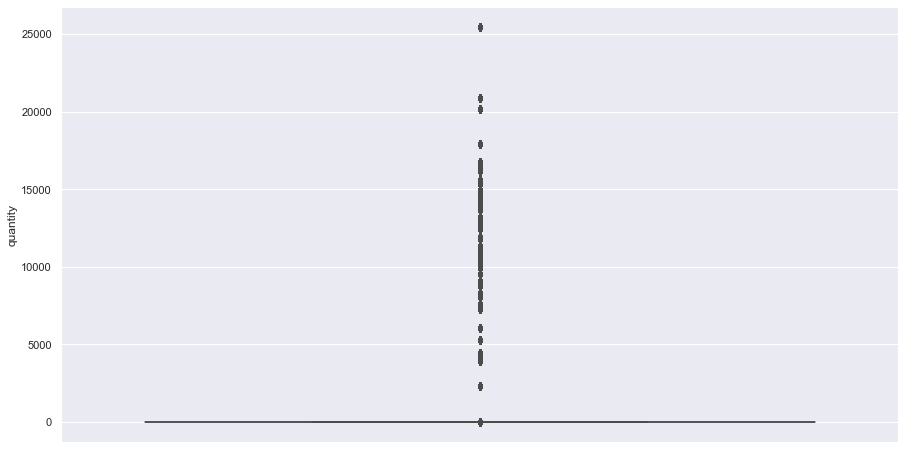

In [40]:
sns.boxplot(data=df, y='quantity')

In [41]:
df[df['quantity']>30]['category'].value_counts()
## the quantites of both category fuel and Miscellaneous are too large (weird)

Fuel             4270
Miscellaneous     510
Name: category, dtype: int64

In [42]:
#now i'm checking whether these categories can use the coupons
df[(df['category']=='Miscellaneous') & (df['coupon_discount']!=0) & (df['redemption_status']==0)]['quantity']

Series([], Name: quantity, dtype: int64)

In [43]:
df[(df['category']=='Fuel')& (df['coupon_discount']!=0) & (df['redemption_status']==0)]['quantity']
#since there's no coupons applied for both categories and we're investigating on coupons behaviour we can drop both categories but i will keep them for extra analysis

Series([], Name: quantity, dtype: int64)

In [44]:
df['selling_price'].unique()
#no errors

array([4.23900e+01, 7.12400e+01, 7.08800e+01, 1.77740e+02, 1.72330e+03,
       3.52600e+01, 5.66400e+01, 7.05300e+01, 3.56200e+01, 1.06500e+02,
       1.49250e+02, 9.11900e+01, 4.59500e+01, 2.34380e+02, 5.91300e+01,
       1.78100e+02, 5.62800e+01, 1.49600e+01, 1.27520e+02, 5.33940e+02,
       2.48980e+02, 1.42120e+02, 2.45800e+01, 1.20750e+02, 9.22600e+01,
       1.85200e+01, 1.06150e+02, 7.44500e+01, 2.10200e+01, 9.58200e+01,
       3.17000e+01, 1.24310e+02, 9.04700e+01, 2.20130e+02, 1.13630e+02,
       4.27080e+02, 2.13720e+02, 6.37600e+01, 5.34300e+01, 4.95100e+01,
       4.77300e+01, 8.86900e+01, 1.67060e+02, 5.94900e+01, 9.90200e+01,
       6.73200e+01, 4.27400e+01, 7.65800e+01, 1.11597e+03, 5.84200e+01,
       1.62780e+02, 1.06860e+02, 1.96620e+02, 1.41770e+02, 9.93800e+01,
       5.30700e+01, 1.48540e+02, 5.20100e+01, 7.76500e+01, 4.98320e+02,
       8.90500e+01, 4.45200e+01, 1.27160e+02, 9.33200e+01, 2.49340e+02,
       1.77030e+02, 2.85000e+01, 9.19000e+01, 2.08730e+02, 2.137

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

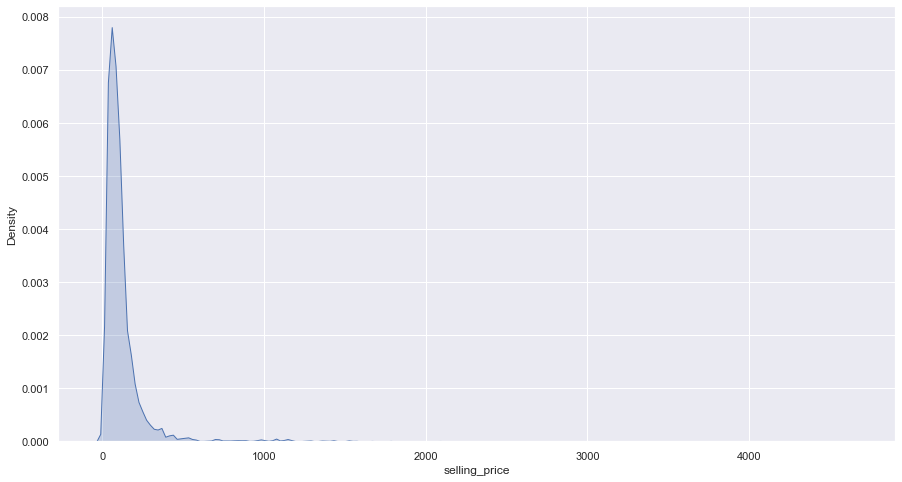

In [45]:
sns.kdeplot(data=df, x='selling_price', shade=True)

In [46]:
## before we show the values of selling price more than 1000 we can perdict that Fuel category will be among of them
df[df['selling_price']>1000]['category'].value_counts()
#so i think the quantity is normal according to selling price (because i don't know source of data) i will work knowing that quantity of Fuel is not normal

Fuel                2286
Pharmaceutical       750
Miscellaneous        490
Grocery               65
Garden                49
Natural Products      48
Name: category, dtype: int64

In [47]:
df['other_discount'].unique()
#no errors

array([ 0.00000e+00, -3.52600e+01, -1.06860e+02, -3.56200e+01,
       -6.77000e+00, -5.30700e+01, -1.48890e+02, -4.20300e+01,
       -8.44200e+01, -3.17000e+01, -1.74500e+01, -3.56000e+00,
       -7.12000e+00, -1.35400e+01, -4.70200e+01, -2.13700e+01,
       -8.55000e+00, -1.38900e+01, -4.98700e+01, -2.45800e+01,
       -3.91800e+01, -1.42500e+01, -1.85200e+01, -8.54900e+01,
       -4.27400e+01, -5.34300e+01, -2.10200e+01, -2.28000e+01,
       -2.31500e+01, -1.06150e+02, -6.19800e+01, -1.14000e+01,
       -1.17500e+01, -2.14000e+00, -7.12400e+01, -8.90500e+01,
       -6.06000e+00, -1.78000e+00, -1.78100e+01, -2.49300e+01,
       -3.21000e+00, -1.03300e+01, -1.60290e+02, -7.80100e+01,
       -2.12300e+02, -4.27000e+00, -1.06900e+01, -9.90200e+01,
       -2.81400e+01, -3.74000e+01, -2.99200e+01, -3.88300e+01,
       -3.54420e+02, -3.98900e+01, -8.90000e+00, -4.48800e+01,
       -9.26000e+00, -4.45200e+01, -1.20400e+02, -5.12900e+01,
       -6.41000e+00, -4.59500e+01, -2.38700e+01, -3.491

In [48]:
df['coupon_discount'].value_counts()
#no errors

 0.00      379098
-35.62       2263
-17.81       1216
-26.71        703
-19.59        631
-14.25        520
-89.05        427
-8.90         419
-53.43        370
-71.24        360
-12.47        349
-10.69        301
-42.74        159
-142.48       143
-106.86       111
-24.93        100
-49.51         87
-249.34        82
-35.26         71
-21.37         67
-59.49         66
-7.12          66
-88.69         54
-16.03         43
-160.29        39
-213.72        15
Name: coupon_discount, dtype: int64

In [49]:
df['brand'].unique()

array([  56,    1,  482,  101,  369, 2088,  619,  717, 1381, 2025,  172,
       2320,  997,   89,  544, 1991,  524, 2035,  162,  332, 1158,  910,
       1025, 1637, 1487, 1555,  714,  115,  408, 3818, 4467, 4400,  133,
        673, 1736, 1088, 1016, 1124, 1337, 3286, 1616,  823,   97,   58,
       3244, 1427,  501,  746,  360,  119,  762,  611,  124,  231,  971,
        939,  879, 1235,  676, 3018, 4954,  989, 4301, 3502,  487,  623,
        946, 2680,  141, 3495,  160,  387, 3399,  574, 2032, 4442, 1446,
        278, 4412,  597,  158,  350, 4788, 2444,  475,   57,  848, 2410,
       1101,  132, 1826,  686, 1567, 1134, 4454,  602, 1457, 1179,  105,
        461, 1075, 4472,  831,  363, 1480,  303, 4515,  412, 1636,  828,
       1105, 1143, 1061,  967,  237,  111, 1891, 1149, 4396,  864, 4359,
        531,  702,   25, 1898,  230,  366,  316,  681, 3347,  209,  782,
        244, 4944, 1415, 1796,  634, 1564,  212, 4319,  757, 2113,  582,
       1791,  908,  147, 1335,  853, 5086,  450, 10

In [50]:
##we have to make brand object 
df['brand']=to_object(df['brand'])

In [51]:
df['brand_type'].value_counts(dropna=False)
#no errors

Established    289183
Local           98577
Name: brand_type, dtype: int64

In [52]:
df['category'].value_counts()
#no errors

Grocery                   272557
Pharmaceutical             45866
Natural Products           18789
Packaged Meat              17802
Dairy, Juices & Snacks      6965
Meat                        5979
Bakery                      5835
Fuel                        4270
Prepared Food               4089
Seafood                     1792
Skin & Hair Care            1339
Miscellaneous               1176
Flowers & Plants             911
Travel                       160
Alcohol                      148
Garden                        49
Restauarant                   33
Name: category, dtype: int64

#### <font color='red'> End of Univariate analysis !

In [53]:
df.isnull().mean()*100

id                    0.000000
campaign_id           0.000000
coupon_id             0.000000
customer_id           0.000000
redemption_status     0.000000
age_range             0.000000
marital_status       40.322106
rented                0.000000
family_size           0.000000
no_of_children       63.599907
income_bracket        0.000000
campaign_type         0.000000
start_date            0.000000
end_date              0.000000
date                  0.000000
item_id               0.000000
quantity              0.000000
selling_price         0.000000
other_discount        0.000000
coupon_discount       0.000000
brand                 0.000000
brand_type            0.000000
category              0.000000
dtype: float64

In [54]:
## both features will be dropped (martial_status,no_of_children)

### Q10- Show the martial status for customers attended each campagin.


In [55]:
df['dummy']=1

In [56]:
pd.pivot_table(data=df,index='campaign_type' ,columns='marital_status', values='dummy', aggfunc=sum)

marital_status,Married,Single
campaign_type,,
X,119987,35581
Y,59556,16283


Text(0.5, 1.0, 'Total customers Per Campaign & Marital status')

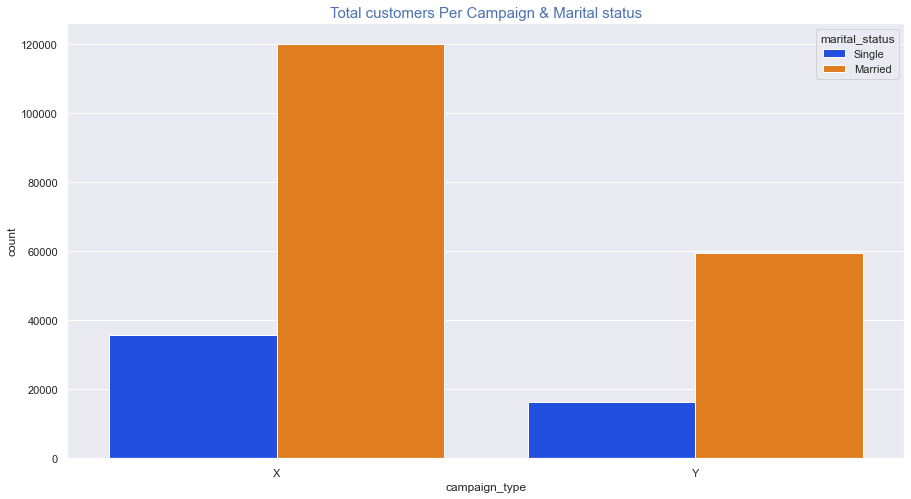

In [57]:
sns.countplot(data=df, x='campaign_type', hue='marital_status', hue_order=['Single','Married'], palette='bright')
plt.title('Total customers Per Campaign & Marital status', size=15, color='b')

In [58]:
# Now after we answerd the question about martial status feature i will drop nulls columns
df.drop(['marital_status','no_of_children'], axis=1, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387760 entries, 0 to 387759
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 387760 non-null  object 
 1   campaign_id        387760 non-null  object 
 2   coupon_id          387760 non-null  object 
 3   customer_id        387760 non-null  object 
 4   redemption_status  387760 non-null  int64  
 5   age_range          387760 non-null  object 
 6   rented             387760 non-null  int64  
 7   family_size        387760 non-null  object 
 8   income_bracket     387760 non-null  int64  
 9   campaign_type      387760 non-null  object 
 10  start_date         387760 non-null  object 
 11  end_date           387760 non-null  object 
 12  date               387760 non-null  object 
 13  item_id            387760 non-null  object 
 14  quantity           387760 non-null  int64  
 15  selling_price      387760 non-null  float64
 16  ot

In [60]:
df.isnull().mean()*100

id                   0.0
campaign_id          0.0
coupon_id            0.0
customer_id          0.0
redemption_status    0.0
age_range            0.0
rented               0.0
family_size          0.0
income_bracket       0.0
campaign_type        0.0
start_date           0.0
end_date             0.0
date                 0.0
item_id              0.0
quantity             0.0
selling_price        0.0
other_discount       0.0
coupon_discount      0.0
brand                0.0
brand_type           0.0
category             0.0
dummy                0.0
dtype: float64

#### <font color='red'>Some useful feature engineering

In [61]:
#change the datatype of start_date and end_date of each campaign and get duration of each campagin
df['start_date']=pd.to_datetime(df['start_date'], format='%d/%m/%y')
df['end_date']=pd.to_datetime(df['end_date'], format='%d/%m/%y')
df['duration_of_campagin']=np.round((df['end_date']-df['start_date'])/np.timedelta64(1,'M'),2)

In [62]:
df['duration_of_campagin'].sample(10)

42949     1.58
385430    1.51
162894    1.74
240643    1.12
241975    1.58
226907    1.58
235216    1.51
121641    1.31
367133    1.05
259591    1.74
Name: duration_of_campagin, dtype: float64

In [63]:
#The date of product sold:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')

In [64]:
## lets make columns for years,month and days of each activity
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month_name().str[:3:]
df['day']=df['date'].dt.day

In [65]:
print(df['year'].head(),df['month'].head(),df['day'].head())

0    2013
1    2012
2    2013
3    2012
4    2013
Name: year, dtype: int64 0    Jun
1    Jun
2    Jun
3    Jun
4    Jun
Name: month, dtype: object 0    11
1    24
2    11
3    24
4    11
Name: day, dtype: int64


In [66]:
## also let's make another column for income_level [Low-Lower/Middle-Upper/Middle-High Income]
df['income_bracket'].value_counts().sort_index().index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [67]:
def get_income_level(l):
    if l in [1,2]:
        return 'Low-Lower'
    elif l in [3,4]:
        return 'Low'
    elif l in [5,6]:
        return 'Middle-Lower'
    elif l in [7,8]:
        return 'Middle'
    elif l in [9,10]:
        return 'Middle_upper'
    else:
        return 'Hight Income'

In [68]:
df['income_level']=df['income_bracket'].apply(get_income_level)

In [69]:
df['income_level'].value_counts()

Middle-Lower    147724
Low             100552
Low-Lower        56483
Middle           40091
Middle_upper     27872
Hight Income     15038
Name: income_level, dtype: int64

In [70]:
#### we can get price per each product 
df['product_price']=(df['selling_price']-df['other_discount']-df['coupon_discount'])/df['quantity']

In [71]:
df['product_price'].describe()

count    387760.000000
mean        104.275510
std         127.704523
min           0.069770
25%          49.510000
50%          85.130000
75%         127.870000
max        4630.240000
Name: product_price, dtype: float64

In [72]:
df[df['category']=='Fuel'][['product_price','quantity','selling_price']]
#prodcut price for fuel is not logical based on the quantity and selling price columns (idk the source so i will keep it as it is )

,product_price,quantity,selling_price
19185,0.094746,3955,360.47
19191,0.094746,3955,360.47
19197,0.094746,3955,360.47
19203,0.094746,3955,360.47
19209,0.094746,3955,360.47
...,...,...,...
387158,0.084771,12757,1081.07
387169,0.084771,12757,1081.07
387180,0.084771,12757,1081.07
387191,0.084771,12757,1081.07


In [73]:
df.sample(10)

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,campaign_type,...,brand,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price
260937,33553,13,756,533,0,36-45,0,5+,6,X,...,2180,Established,Pharmaceutical,1,1.54,2012,Jul,2,Middle-Lower,70.885
98615,70089,13,24,795,0,46-55,0,2,5,X,...,56,Local,Natural Products,1,1.54,2012,May,30,Middle-Lower,53.070
340423,55514,8,583,1314,0,46-55,0,3,1,X,...,782,Established,Grocery,1,1.58,2012,Oct,31,Low-Lower,106.500
308057,21776,8,1000,329,0,46-55,0,2,6,X,...,771,Established,Pharmaceutical,1,1.58,2012,Jun,5,Middle-Lower,95.820
32296,125024,5,431,572,0,36-45,0,2,4,Y,...,278,Established,Grocery,1,1.12,2012,Nov,20,Low,112.200
332720,40381,13,1007,1364,0,46-55,0,1,6,X,...,56,Local,Grocery,1,1.54,2012,Oct,20,Middle-Lower,85.135
119424,73273,26,429,1441,0,36-45,0,3,2,X,...,158,Established,Pharmaceutical,1,1.31,2013,Mar,24,Low-Lower,11.400
134544,68993,8,532,444,0,46-55,0,2,2,X,...,2134,Established,Pharmaceutical,1,1.58,2012,Jan,29,Low-Lower,152.810
58101,102373,26,307,131,0,46-55,0,2,5,X,...,160,Established,Grocery,1,1.31,2013,Apr,16,Middle-Lower,42.390
65503,30536,8,8,1058,0,46-55,0,3,5,X,...,714,Established,Grocery,1,1.58,2012,Jun,25,Middle-Lower,85.130


In [74]:
## let's check on the columns that we used [fetch for errorrs]
df['income_bracket'].value_counts()

5     105720
4      66817
6      42004
3      33735
1      30719
2      25764
8      24229
9      21255
7      15862
12     13439
10      6617
11      1599
Name: income_bracket, dtype: int64

In [75]:
df['end_date'].value_counts()

2013-07-05    108042
2013-04-05     98651
2012-09-21     29456
2013-01-04     29408
2012-11-30     19536
2013-06-07     19006
2013-04-12     15966
2013-05-24     14130
2013-02-15     11931
2013-05-10     11389
2013-03-08      8920
2013-02-08      5736
2012-11-16      4704
2013-02-16      3944
2012-10-27      3186
2013-01-18      3106
2013-03-01       649
Name: end_date, dtype: int64

In [76]:
df['start_date'].value_counts()

2013-05-19    108042
2013-02-16     98651
2013-04-22     33136
2012-08-12     29456
2012-11-19     29408
2012-10-08     19536
2013-03-11     15966
2013-01-12     11931
2013-04-08     11389
2013-02-02      8920
2013-01-07      5736
2012-09-16      4704
2012-12-22      3944
2012-08-25      3186
2012-12-17      2512
2013-01-28       649
2012-12-12       594
Name: start_date, dtype: int64

In [77]:
df['date'].unique()

array(['2013-06-11T00:00:00.000000000', '2012-06-24T00:00:00.000000000',
       '2012-11-25T00:00:00.000000000', '2012-08-04T00:00:00.000000000',
       '2012-03-16T00:00:00.000000000', '2012-07-14T00:00:00.000000000',
       '2012-08-01T00:00:00.000000000', '2012-05-14T00:00:00.000000000',
       '2012-11-21T00:00:00.000000000', '2012-08-29T00:00:00.000000000',
       '2013-03-04T00:00:00.000000000', '2013-04-22T00:00:00.000000000',
       '2013-06-16T00:00:00.000000000', '2013-06-18T00:00:00.000000000',
       '2013-02-20T00:00:00.000000000', '2012-11-14T00:00:00.000000000',
       '2012-06-10T00:00:00.000000000', '2012-08-13T00:00:00.000000000',
       '2012-07-07T00:00:00.000000000', '2012-02-20T00:00:00.000000000',
       '2012-11-03T00:00:00.000000000', '2012-04-29T00:00:00.000000000',
       '2012-10-17T00:00:00.000000000', '2012-10-13T00:00:00.000000000',
       '2012-01-21T00:00:00.000000000', '2012-02-25T00:00:00.000000000',
       '2012-10-26T00:00:00.000000000', '2012-04-22

In [78]:
#check on missing values again
df.isnull().mean()*100

id                      0.0
campaign_id             0.0
coupon_id               0.0
customer_id             0.0
redemption_status       0.0
age_range               0.0
rented                  0.0
family_size             0.0
income_bracket          0.0
campaign_type           0.0
start_date              0.0
end_date                0.0
date                    0.0
item_id                 0.0
quantity                0.0
selling_price           0.0
other_discount          0.0
coupon_discount         0.0
brand                   0.0
brand_type              0.0
category                0.0
dummy                   0.0
duration_of_campagin    0.0
year                    0.0
month                   0.0
day                     0.0
income_level            0.0
product_price           0.0
dtype: float64

#### <font color='red'>Done with feature engineering

#### <font color='red'> Check for Outliers

In [79]:
from datasist.structdata import detect_outliers

In [80]:
df.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387760 entries, 0 to 387759
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   redemption_status     387760 non-null  int64  
 1   rented                387760 non-null  int64  
 2   income_bracket        387760 non-null  int64  
 3   quantity              387760 non-null  int64  
 4   selling_price         387760 non-null  float64
 5   other_discount        387760 non-null  float64
 6   coupon_discount       387760 non-null  float64
 7   dummy                 387760 non-null  int64  
 8   duration_of_campagin  387760 non-null  float64
 9   year                  387760 non-null  int64  
 10  day                   387760 non-null  int64  
 11  product_price         387760 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 38.5 MB


Text(0.5, 0.98, 'Check-For-Outliers [Box-Plots]')

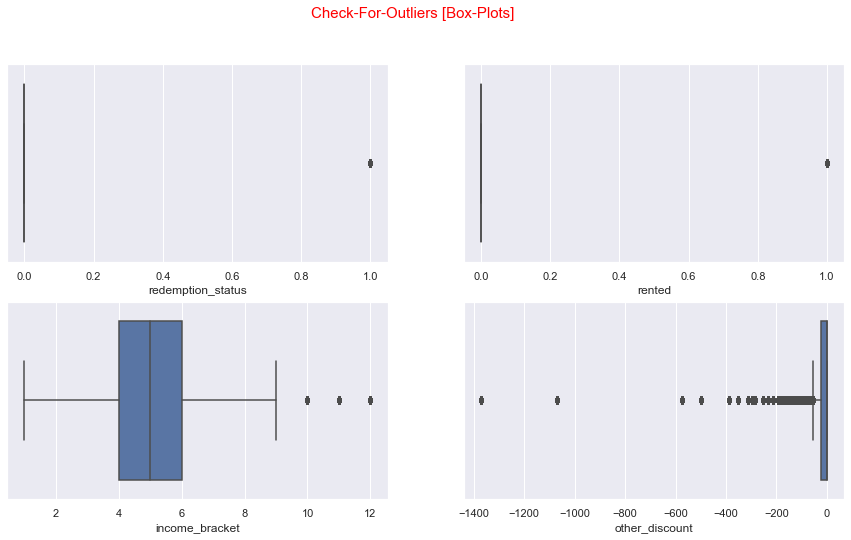

In [81]:
#let's look for the first 4 columns
plt.subplot(2,2,1)
sns.boxplot(data=df,x='redemption_status') #it's normal as it's one and zero
plt.subplot(2,2,2)
sns.boxplot(data=df,x='rented') #it's normal data is boealen
plt.subplot(2,2,3)
sns.boxplot(data=df,x='income_bracket') #it means there are customers at the high income class attend campaigns
plt.subplot(2,2,4)
sns.boxplot(data=df,x='other_discount')
plt.suptitle('Check-For-Outliers [Box-Plots]',c='red',size=15)

In [82]:
# Pharmaceutical category has discounts that reach to -400. (which is we have to ask the client about them)
df[df['other_discount']<-400]['category'].value_counts()

Pharmaceutical    247
Name: category, dtype: int64

In [83]:
df[df['other_discount']<-400][['quantity','selling_price','coupon_discount','other_discount','brand','product_price','category']].sample(10)

,quantity,selling_price,coupon_discount,other_discount,brand,product_price,category
228973,2,64.12,0.0,-576.33,4567,320.225,Pharmaceutical
158863,1,3561.64,0.0,-1068.60,4533,4630.240,Pharmaceutical
40953,2,498.32,0.0,-498.32,560,498.320,Pharmaceutical
41817,2,498.32,0.0,-498.32,560,498.320,Pharmaceutical
228847,2,64.12,0.0,-576.33,4567,320.225,Pharmaceutical
41277,2,498.32,0.0,-498.32,560,498.320,Pharmaceutical
158935,1,3561.64,0.0,-1068.60,4533,4630.240,Pharmaceutical
41493,2,498.32,0.0,-498.32,560,498.320,Pharmaceutical
228921,2,64.12,0.0,-576.33,4567,320.225,Pharmaceutical
351542,1,1371.01,0.0,-1371.37,1236,2742.380,Pharmaceutical


Text(1.0, 1.0, 'Box-plot for [Quantity]')

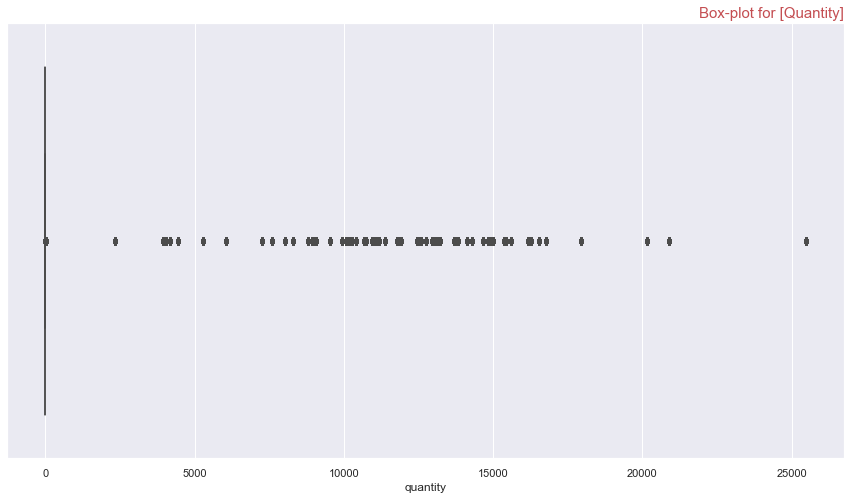

In [84]:
sns.boxplot(data=df,x='quantity')
plt.title('Box-plot for [Quantity]', size=15,loc='right',c='r')

In [85]:
df.iloc[detect_outliers(data=df,n=0,features=["quantity"])]

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,campaign_type,...,brand,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price
62,2,13,116,48,0,36-45,0,2,3,X,...,482,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.510000
65,6959,13,992,48,0,36-45,0,2,3,X,...,482,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.510000
68,8549,13,150,48,0,36-45,0,2,3,X,...,482,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.510000
71,23391,13,888,48,0,36-45,0,2,3,X,...,482,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.510000
74,29651,13,601,48,0,36-45,0,2,3,X,...,482,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387727,122973,26,338,158,0,36-45,0,4,8,X,...,56,Local,Grocery,1,1.31,2012,Sep,23,Middle,53.075000
387732,125401,26,326,158,0,36-45,0,4,8,X,...,56,Local,Grocery,1,1.31,2012,Aug,16,Middle,53.073333
387734,125401,26,326,158,0,36-45,0,4,8,X,...,56,Local,Grocery,1,1.31,2012,Sep,23,Middle,53.075000
387739,126168,26,1048,158,0,36-45,0,4,8,X,...,56,Local,Grocery,1,1.31,2012,Aug,16,Middle,53.073333


In [86]:
df[df['quantity']>30]['category'].value_counts()
#so for better analysis i will drop the two categories [Fuel,Miscellaneous] 

Fuel             4270
Miscellaneous     510
Name: category, dtype: int64

In [87]:
idx=df[df['category'].isin(df[df['quantity']>30]['category'].value_counts().index)]['category'].index

In [88]:
df.drop(idx,axis=0, inplace=True)

Text(0.5, 1.0, 'Distirbution Of Quantity')

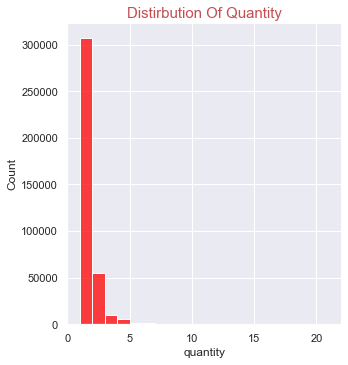

In [89]:
sns.displot(data=df,x='quantity', color='red' )
plt.title('Distirbution Of Quantity', size=15, c='r')
#now the quantity distirbution is better as the quantities and their outliers make sense. 

In [90]:
#now let's see the selling price 
df['selling_price'].describe()

count    382314.000000
mean        107.057018
std         125.324795
min           1.780000
25%          49.510000
50%          81.570000
75%         124.310000
max        4630.240000
Name: selling_price, dtype: float64

Text(0.5, 1.0, 'Box-plot for Selling_price')

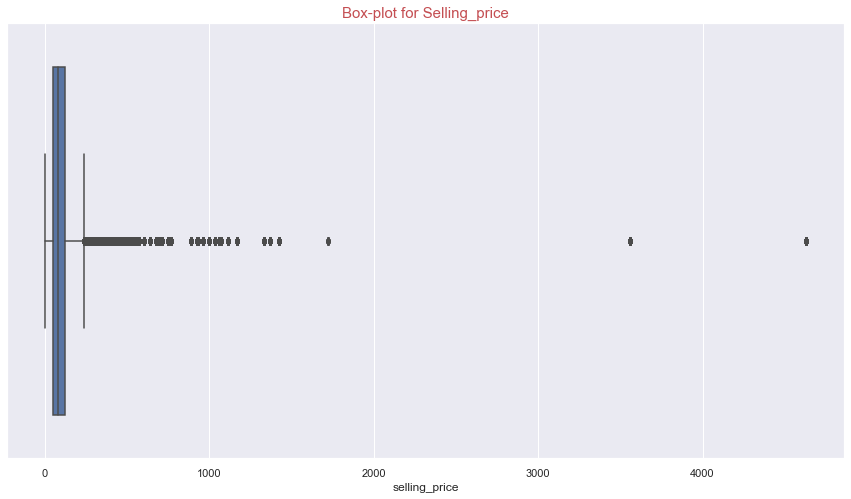

In [91]:
sns.boxplot(data=df,x='selling_price')
plt.title("Box-plot for Selling_price",size=15,c='r')

In [92]:
df[df['selling_price']>4000]
#so i will keep outliers of selling price (logical data).

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,campaign_type,...,brand,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price
296140,5175,13,667,414,0,70+,0,2,6,X,...,808,Local,Pharmaceutical,1,1.54,2013,Feb,1,Middle-Lower,4630.24
296150,9493,13,422,414,0,70+,0,2,6,X,...,808,Local,Pharmaceutical,1,1.54,2013,Feb,1,Middle-Lower,4630.24
296160,14347,13,480,414,0,70+,0,2,6,X,...,808,Local,Pharmaceutical,1,1.54,2013,Feb,1,Middle-Lower,4630.24
296170,19239,13,110,414,0,70+,0,2,6,X,...,808,Local,Pharmaceutical,1,1.54,2013,Feb,1,Middle-Lower,4630.24
296180,19820,13,20,414,0,70+,0,2,6,X,...,808,Local,Pharmaceutical,1,1.54,2013,Feb,1,Middle-Lower,4630.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296710,44068,7,1102,414,0,70+,0,2,6,Y,...,808,Local,Pharmaceutical,1,1.12,2013,Feb,1,Middle-Lower,4630.24
296720,70488,7,1050,414,0,70+,0,2,6,Y,...,808,Local,Pharmaceutical,1,1.12,2013,Feb,1,Middle-Lower,4630.24
296730,82236,7,687,414,0,70+,0,2,6,Y,...,808,Local,Pharmaceutical,1,1.12,2013,Feb,1,Middle-Lower,4630.24
296740,91682,7,392,414,0,70+,0,2,6,Y,...,808,Local,Pharmaceutical,1,1.12,2013,Feb,1,Middle-Lower,4630.24


Text(0.5, 0.98, 'Box-Plots For coupon discounts,product price,duration of campagin:')

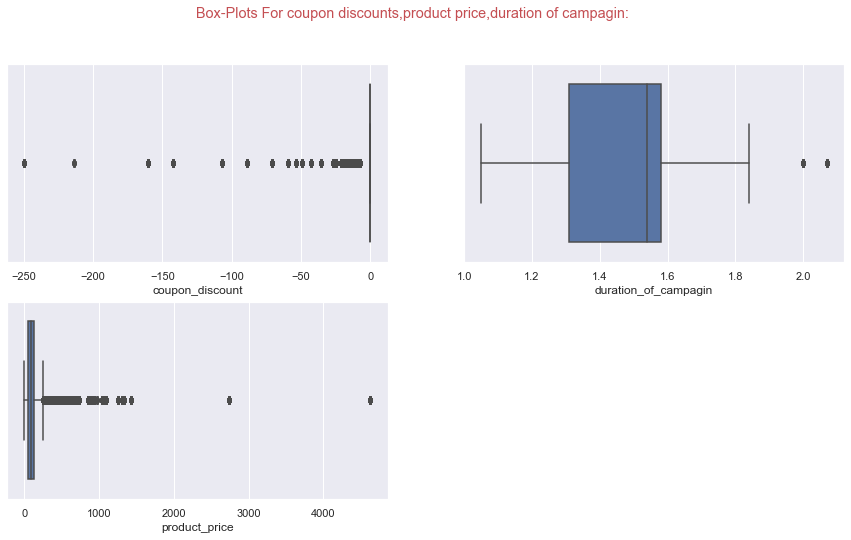

In [93]:
#let's look for the first 4 columns
plt.subplot(2,2,1)
sns.boxplot(data=df,x='coupon_discount') #it's normal as it's one and zero
plt.subplot(2,2,2)
sns.boxplot(data=df,x='duration_of_campagin') #it's normal data is boealen
plt.subplot(2,2,3)
sns.boxplot(data=df,x='product_price') #it means there are customers at the high income class attend campaigns
plt.suptitle('Box-Plots For coupon discounts,product price,duration of campagin:',c='r')

In [94]:
df.reset_index(inplace=True)

In [95]:
df[df['coupon_discount']<-20]['category'].value_counts()

Grocery                   3584
Pharmaceutical            1459
Dairy, Juices & Snacks      74
Name: category, dtype: int64

In [96]:
#let's show outliers data for coupon discount
df.iloc[detect_outliers(df,0,["coupon_discount"])]

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,...,brand,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price
62,62,2,13,116,48,0,36-45,0,2,3,...,482,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.51
65,65,6959,13,992,48,0,36-45,0,2,3,...,482,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.51
68,68,8549,13,150,48,0,36-45,0,2,3,...,482,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.51
71,71,23391,13,888,48,0,36-45,0,2,3,...,482,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.51
74,74,29651,13,601,48,0,36-45,0,2,3,...,482,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382278,387724,122973,26,338,158,0,36-45,0,4,8,...,681,Established,Grocery,1,1.31,2012,Aug,16,Middle,184.87
382284,387730,125401,26,326,158,0,36-45,0,4,8,...,1105,Established,Grocery,1,1.31,2012,Jul,18,Middle,177.74
382285,387731,125401,26,326,158,0,36-45,0,4,8,...,681,Established,Grocery,1,1.31,2012,Aug,16,Middle,184.87
382291,387737,126168,26,1048,158,0,36-45,0,4,8,...,1105,Established,Grocery,1,1.31,2012,Jul,18,Middle,177.74


In [97]:
df.iloc[detect_outliers(df,0,["coupon_discount"])]['category'].value_counts()
# I will keep outliers. 

Grocery                   6662
Pharmaceutical            1825
Bakery                      80
Dairy, Juices & Snacks      74
Natural Products            21
Name: category, dtype: int64

In [98]:
## let's see duration of campagin outliers
df.iloc[detect_outliers(df,0,["duration_of_campagin"])]

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,...,brand,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price
2290,2290,1150,28,525,590,0,36-45,0,2,1,...,1025,Established,Grocery,1,2.0,2012,Jan,21,Low-Lower,142.12
2291,2291,1150,28,525,590,0,36-45,0,2,1,...,1637,Established,Natural Products,1,2.0,2012,Feb,25,Low-Lower,67.32
2292,2292,1150,28,525,590,0,36-45,0,2,1,...,524,Established,Grocery,1,2.0,2012,Oct,26,Low-Lower,88.69
2293,2293,1150,28,525,590,0,36-45,0,2,1,...,56,Local,Grocery,1,2.0,2012,Apr,22,Low-Lower,28.14
2294,2294,1150,28,525,590,0,36-45,0,2,1,...,1487,Established,Natural Products,1,2.0,2012,Jul,6,Low-Lower,106.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379475,384887,127936,28,1061,1337,0,36-45,0,5+,6,...,498,Established,"Dairy, Juices & Snacks",1,2.0,2013,Jan,6,Middle-Lower,127.88
379476,384888,127936,28,1061,1337,0,36-45,0,5+,6,...,946,Established,Grocery,1,2.0,2013,Feb,20,Middle-Lower,161.35
379477,384889,127936,28,1061,1337,0,36-45,0,5+,6,...,524,Established,Grocery,1,2.0,2013,Feb,10,Middle-Lower,102.94
379478,384890,127936,28,1061,1337,0,36-45,0,5+,6,...,56,Local,Grocery,1,2.0,2013,Jan,2,Middle-Lower,16.03


In [99]:
df.iloc[detect_outliers(df,0,["duration_of_campagin"])]['duration_of_campagin'].value_counts()
# 2,2.07 it's outliers from duratiion of campagins as it's longer than other values (it's normal to keep them).

2.00    4704
2.07    3105
Name: duration_of_campagin, dtype: int64

In [100]:
## show the camapgins which have outlier duration
df[df['duration_of_campagin'].isin([2,2.07])]["campaign_type"].value_counts()
#campagin 

Y    7809
Name: campaign_type, dtype: int64

In [101]:
# last one is product_price it has outliers. It has been cearted from feature engineering on selling_price and it's Logical.

In [102]:
df.shape

(382314, 29)

#### <font color='red'>Done With Outliers

#### Q1-<font color='red'>Show the top 10 brands have highest reedemed coupons </font>

In [103]:
df[['redemption_status','brand']].sample(10)

,redemption_status,brand
29203,0,634
380610,0,602
302581,0,56
109587,0,619
203045,0,997
109498,0,56
235090,0,544
33257,0,350
118103,0,971
88347,0,602


In [104]:
df[df['redemption_status']==1]['brand'].value_counts().sort_values(ascending=False).head(10)

56     1327
487     161
714     143
686     114
172     106
1        98
158      97
278      92
971      91
946      87
Name: brand, dtype: int64

In [105]:
idx=df[df['redemption_status']==1]['brand'].value_counts().sort_values(ascending=False).head(10).index

In [106]:
top_10_brand=df[df['brand'].isin(idx)]
top_10_brand

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,...,brand,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price
0,0,1,13,27,1053,0,46-55,0,1,5,...,56,Local,Grocery,1,1.54,2013,Jun,11,Middle-Lower,42.390000
1,1,1,13,27,1053,0,46-55,0,1,5,...,56,Local,Natural Products,1,1.54,2012,Jun,24,Middle-Lower,106.500000
2,2,2444,13,513,1053,0,46-55,0,1,5,...,56,Local,Grocery,1,1.54,2013,Jun,11,Middle-Lower,42.390000
3,3,2444,13,513,1053,0,46-55,0,1,5,...,56,Local,Natural Products,1,1.54,2012,Jun,24,Middle-Lower,106.500000
4,4,3651,13,166,1053,0,46-55,0,1,5,...,56,Local,Grocery,1,1.54,2013,Jun,11,Middle-Lower,42.390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382290,387736,125401,26,326,158,0,36-45,0,4,8,...,56,Local,Grocery,1,1.31,2013,Apr,30,Middle,88.690000
382293,387739,126168,26,1048,158,0,36-45,0,4,8,...,56,Local,Grocery,1,1.31,2012,Aug,16,Middle,53.073333
382295,387741,126168,26,1048,158,0,36-45,0,4,8,...,56,Local,Grocery,1,1.31,2012,Sep,23,Middle,53.075000
382296,387742,126168,26,1048,158,0,36-45,0,4,8,...,1,Established,Grocery,1,1.31,2012,Dec,13,Middle,42.740000


Text(0.5, 1.0, 'Top 10 Brands Reedemed Coupons')

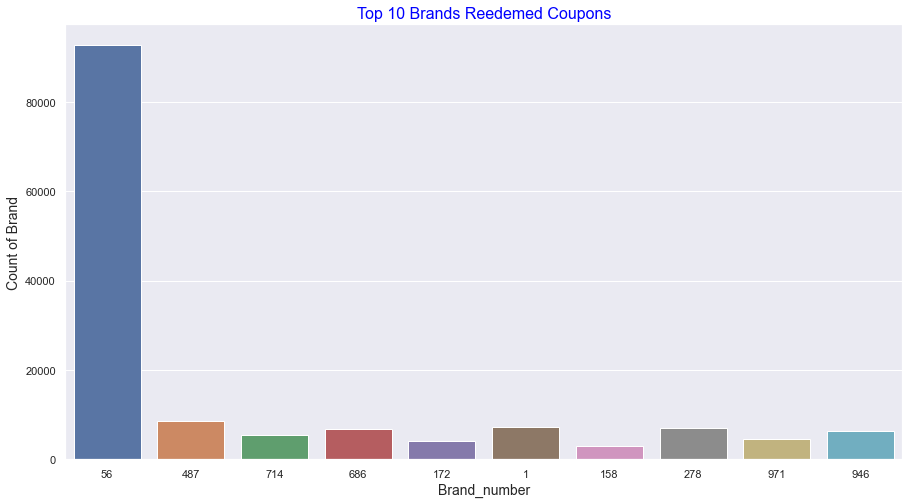

In [107]:
sns.countplot(data=top_10_brand,x='brand',order=idx)
plt.xlabel('Brand_number',size=14)
plt.ylabel('Count of Brand',size=14)
plt.title("Top 10 Brands Reedemed Coupons",size=16,c='Blue')

#### Q2- <font color='red'> Find the most customers age ranges for each campaign category

In [108]:
df.groupby(by='campaign_type').count()['age_range']

campaign_type
X    261905
Y    120409
Name: age_range, dtype: int64

In [109]:
idx=df['age_range'].value_counts().index

Text(0.5, 1.0, 'Amount Of Age Ranges Over Campaign Type')

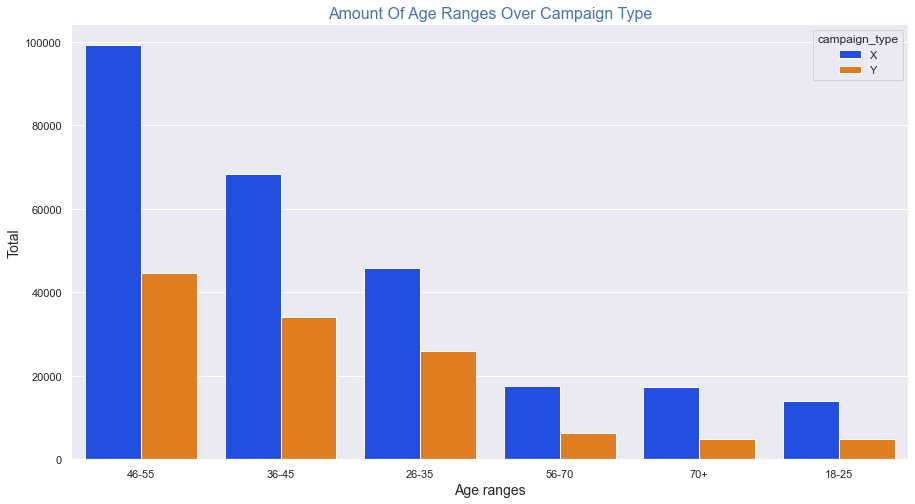

In [110]:
sns.countplot(data=df,x='age_range',hue='campaign_type',palette='bright',order=idx)
plt.xlabel('Age ranges',size=14)
plt.ylabel("Total",size=14)
plt.title("Amount Of Age Ranges Over Campaign Type",size=16,c='b')

#### Q3- <font color='red'>How many of each campagin have been achieved. 

In [111]:
df['dummy']=1

In [112]:
df.groupby(by=['start_date','campaign_type']).count().index

MultiIndex([('2012-08-12', 'X'),
            ('2012-08-25', 'Y'),
            ('2012-09-16', 'Y'),
            ('2012-10-08', 'Y'),
            ('2012-11-19', 'X'),
            ('2012-12-12', 'Y'),
            ('2012-12-17', 'Y'),
            ('2012-12-22', 'Y'),
            ('2013-01-07', 'Y'),
            ('2013-01-12', 'Y'),
            ('2013-01-28', 'Y'),
            ('2013-02-02', 'Y'),
            ('2013-02-16', 'X'),
            ('2013-03-11', 'Y'),
            ('2013-04-08', 'Y'),
            ('2013-04-22', 'Y'),
            ('2013-05-19', 'X')],
           names=['start_date', 'campaign_type'])

In [113]:
print('X-Campagin Done:',pd.pivot_table(data=df,index='campaign_type', columns='start_date', values='dummy').loc['X'].count(),' Times')
print('Y-Campagin Done:',pd.pivot_table(data=df,index='campaign_type', columns='start_date', values='dummy').loc['Y'].count(),'Times')

X-Campagin Done: 4  Times
Y-Campagin Done: 13 Times


################################################################################

#### Q4- <font color='red'>Show the top 10 brands that have high selling price 


In [114]:
df[['brand','selling_price']]

,brand,selling_price
0,56,42.39
1,56,71.24
2,56,42.39
3,56,71.24
4,56,42.39
...,...,...
382309,3152,74.80
382310,3152,74.80
382311,3152,74.80
382312,3152,74.80


In [115]:
print("The Top 10 Brands In Sale:")
df.groupby(by='brand').sum()['selling_price'].sort_values(ascending=False).head(10)

The Top 10 Brands In Sale:


brand
56      7235256.80
686     1535291.51
89       768921.67
278      698818.26
487      695355.13
1088     661332.92
946      550133.24
714      530143.07
1        529884.22
1124     504955.95
Name: selling_price, dtype: float64

In [116]:
idx=df.groupby(by='brand').sum()['selling_price'].sort_values(ascending=False).head(10).index

In [117]:
idx

Index(['56', '686', '89', '278', '487', '1088', '946', '714', '1', '1124'], dtype='object', name='brand')

Text(0.5, 1.0, 'Amount Of Selling Price Per Brand')

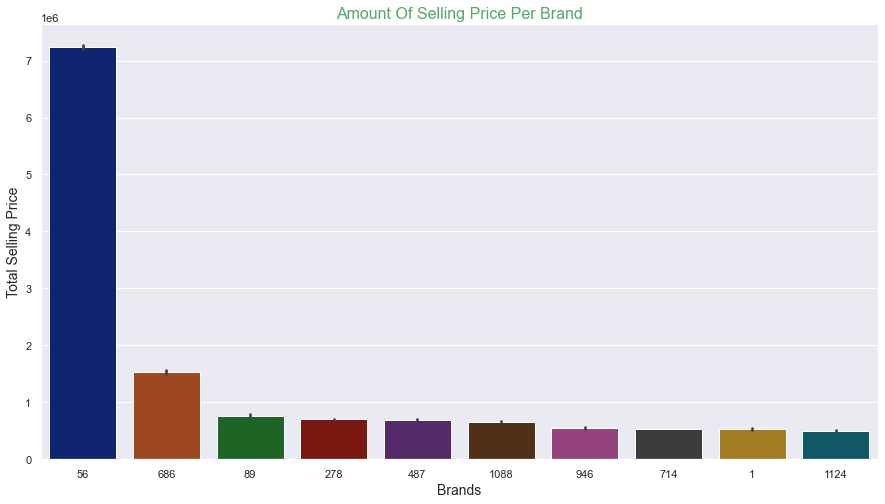

In [118]:
sns.barplot(data=df[df['brand'].isin(idx)],x='brand',y='selling_price', estimator=sum, order=idx,palette='dark')
plt.xlabel("Brands",size=14)
plt.ylabel("Total Selling Price", size=14)
plt.title("Amount Of Selling Price Per Brand", size=16, color='g')

#### Q5-<font color='red'> show highest campaign seasons in total selling for each campaign

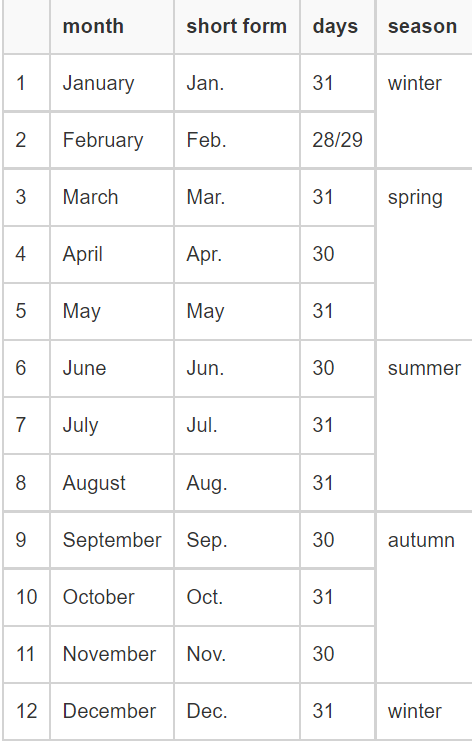

In [119]:
df['month'].value_counts().index

Index(['May', 'Jun', 'Apr', 'Mar', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep', 'Dec',
       'Aug', 'Oct'],
      dtype='object')

In [120]:
## Another feature engineering
def get_season(s):
    if s in ['Jan','Feb']:
        return 'Winter'
    elif s in ['Mar','Apr','May']:
        return 'Spring'
    elif s in ['Jun','Jul','Aug']:
        return 'Summer'
    elif s in ['Sep','Oct','Nov']:
        return 'Autumn'
    elif s == 'Dec':
        return 'Winter'
    else:
        return np.nan

In [121]:
## a new feature 
df['season']=df['month'].apply(get_season)

In [122]:
df[['month','season']].sample(100)

,month,season
332845,Jun,Summer
224205,Jun,Summer
248758,May,Spring
304295,May,Spring
215237,Dec,Winter
...,...,...
106754,Jul,Summer
114478,Jun,Summer
212421,May,Spring
237496,Apr,Spring


In [123]:
df['season'].unique()

array(['Summer', 'Autumn', 'Spring', 'Winter'], dtype=object)

In [124]:
pd.pivot_table(data=df,index='campaign_type',columns='season',values='selling_price',aggfunc=sum)

season,Autumn,Spring,Summer,Winter
campaign_type,,,,
X,5560814.01,9084719.25,7061746.00,6369091.81
Y,2584837.53,4043434.07,3157951.69,3066802.53


Text(0.5, 1.0, 'Total Amount Of Selling Price On Seasons For Each Campaign')

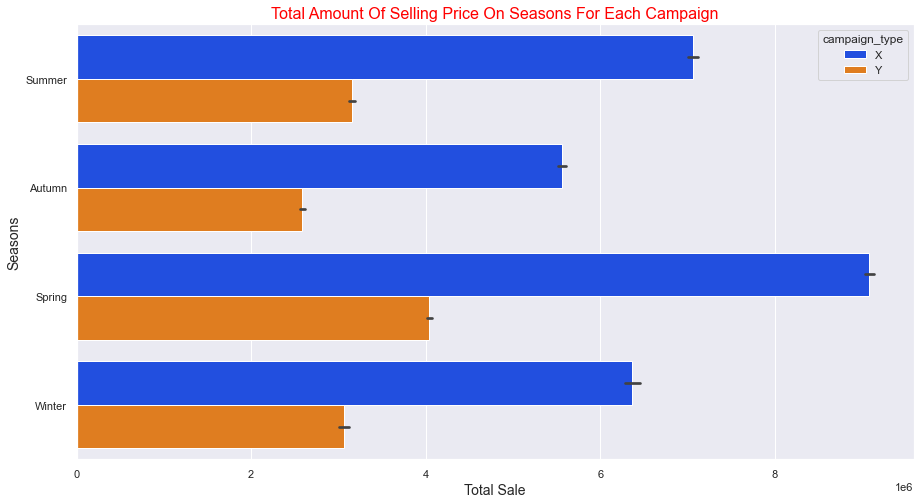

In [125]:
sns.barplot(data=df,y='season',x='selling_price',hue='campaign_type',estimator=sum,palette='bright')
plt.ylabel("Seasons",size=14)
plt.xlabel("Total Sale",size=14)
plt.title("Total Amount Of Selling Price On Seasons For Each Campaign",size=16,c='red')


#### Q6- <font color='red'>Describe the Duration(months) of each campagin 


In [126]:
df['campaign_type'].unique()

array(['X', 'Y'], dtype=object)

In [127]:
# for campagin x
print("Campaign X:")
df[df['campaign_type']=='X']['duration_of_campagin'].describe()

Campaign X:


count    261905.000000
mean          1.525984
std           0.079854
min           1.310000
25%           1.540000
50%           1.540000
75%           1.580000
max           1.580000
Name: duration_of_campagin, dtype: float64

In [128]:
# for campaign Y
print("Campaign Y:")
df[df['campaign_type']=='Y']['duration_of_campagin'].describe()

Campaign Y:


count    120409.000000
mean          1.333750
std           0.334504
min           1.050000
25%           1.050000
50%           1.120000
75%           1.740000
max           2.070000
Name: duration_of_campagin, dtype: float64

#### Q7- <font color='red'> Which campaign type has longer duration in each season 


In [129]:
pd.pivot_table(data=df,index='season',columns='campaign_type',values='duration_of_campagin',aggfunc=max)

campaign_type,X,Y
season,,
Autumn,1.58,2.07
Spring,1.58,2.07
Summer,1.58,2.07
Winter,1.58,2.07


Text(0.5, 1.0, 'Maximum Duration OF Each Campaign Per Seasons')

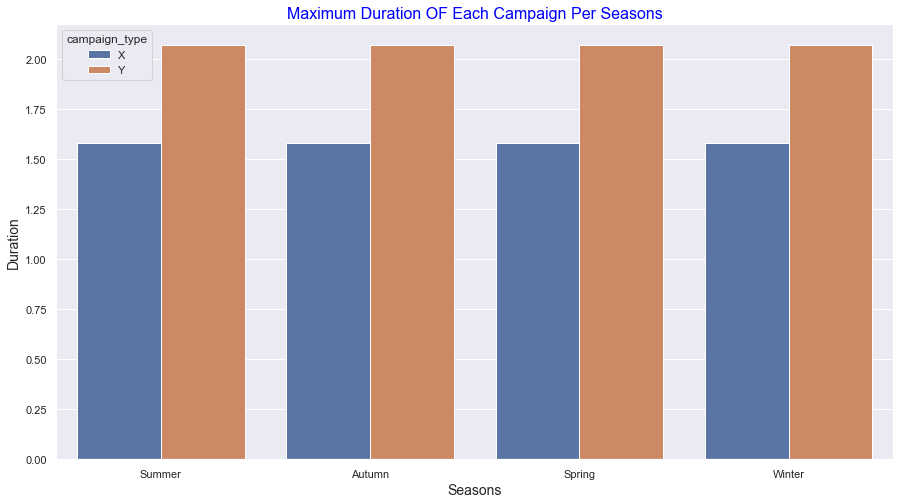

In [130]:
sns.barplot(data=df,x='season',y='duration_of_campagin',hue='campaign_type',estimator=max)
plt.xlabel("Seasons",size=14)
plt.ylabel("Duration",size=14)
plt.title("Maximum Duration OF Each Campaign Per Seasons",size=16, c='blue')

#### Q8-<font color='red'>Find the total selling in each month for each campagin . 


In [131]:
idx=df.groupby(by=['month','campaign_type'])['selling_price'].sum().sort_values(ascending=False).values

In [132]:
print("The Total Price Per Campaign for Each Month: ")
pd.pivot_table(data=df,index='campaign_type',columns='month',values='selling_price',aggfunc=sum)

The Total Price Per Campaign for Each Month: 


month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
campaign_type,,,,,,,,,,,,
X,3034446.00,1877893.49,1819376.20,2497301.20,2052414.41,1947555.76,3236296.75,2604747.15,3445526.10,1928397.21,1749136.05,1883280.75
Y,1312221.42,848842.14,933907.95,1231182.79,901711.79,889354.70,1419754.85,1166016.14,1565196.51,924429.80,821359.61,839048.12


In [133]:
idx

array([3445526.1 , 3236296.75, 3034446.  , 2604747.15, 2497301.2 ,
       2052414.41, 1947555.76, 1928397.21, 1883280.75, 1877893.49,
       1819376.2 , 1749136.05, 1565196.51, 1419754.85, 1312221.42,
       1231182.79, 1166016.14,  933907.95,  924429.8 ,  901711.79,
        889354.7 ,  848842.14,  839048.12,  821359.61])

In [ ]:
sns.barplot(data=df,y='campaign_type',x='selling_price',hue='month',estimator=sum,palette='bright',order=['Y','X'])
plt.ylabel("Cmapagin",size=14)
plt.xlabel("Total Sale",size=14)
plt.title("Total selling Price for each Campaign".title(),size=16, c='blue')

#### Q9- <font color='red'>Describe Bracket Income

In [135]:
df['income_bracket'].describe()

count    382314.000000
mean          5.070293
std           2.514619
min           1.000000
25%           4.000000
50%           5.000000
75%           6.000000
max          12.000000
Name: income_bracket, dtype: float64

<AxesSubplot:ylabel='income_bracket'>

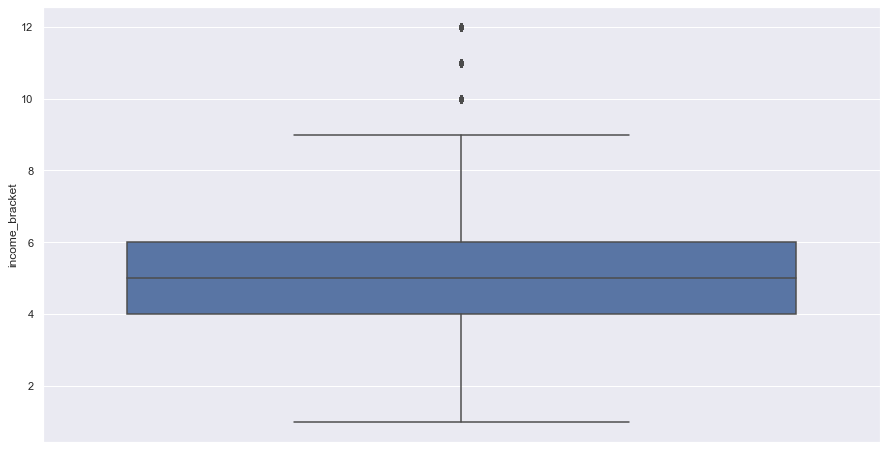

In [136]:
sns.boxplot(data=df,y='income_bracket')

#### Q10- <font color='red'> Show the top 15 customers who reedemed more coupons

In [137]:
print("Top Ten Customers IDs:")
top_10_customers=df[df['redemption_status']==1]['customer_id'].value_counts().head(15).index
top_10_customers.values

Top Ten Customers IDs:


array(['1574', '566', '1136', '235', '626', '959', '1115', '1210', '1387',
       '1070', '627', '464', '1558', '510', '1257'], dtype=object)

Text(0.5, 1.0, 'Total Coupons Per Customers')

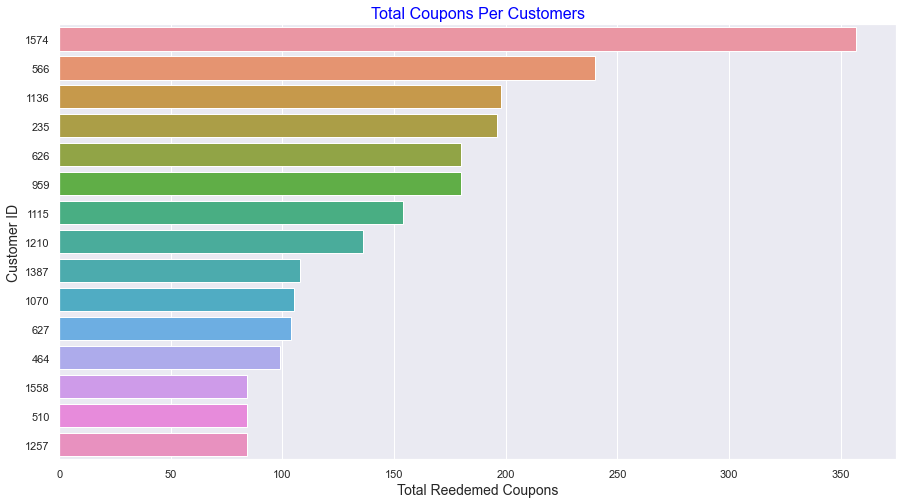

In [138]:
sns.countplot(data=df[(df['customer_id'].isin(top_10_customers)&(df['redemption_status']==1))],y='customer_id',order=top_10_customers)
plt.ylabel("Customer ID",size=14)
plt.xlabel("Total Reedemed Coupons",size=14)
plt.title("Total Coupons Per Customers",size=16, c='blue')

#### Q11- <font color='red'> Find how many reedemed coupons in each campaign type for the top five brands in selling price 


In [139]:
top_5_brands=df.groupby(by='brand').sum()['selling_price'].sort_values(ascending=False).head(5).index
top_5_brands

Index(['56', '686', '89', '278', '487'], dtype='object', name='brand')

In [140]:
df_top_5=df[(df['redemption_status']==1) & (df['brand'].isin(top_5_brands))]
df_top_5

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,...,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price,season
256,256,11043,9,607,205,1,46-55,0,2,7,...,Local,Natural Products,1,1.05,2012,Aug,29,Middle,106.500000,Summer
7216,7216,22826,13,610,712,1,46-55,0,3,5,...,Local,Grocery,1,1.54,2013,May,22,Middle-Lower,70.880000,Spring
7288,7288,72479,13,770,712,1,46-55,0,3,5,...,Local,Grocery,1,1.54,2013,May,22,Middle-Lower,70.880000,Spring
7612,7612,43305,8,754,712,1,46-55,0,3,5,...,Local,Grocery,1,1.58,2013,May,22,Middle-Lower,70.880000,Spring
12074,12074,33610,13,754,1152,1,46-55,0,3,10,...,Established,Grocery,1,1.54,2013,Feb,2,Middle_upper,35.260000,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374976,380388,45595,11,913,909,1,46-55,0,5+,8,...,Established,Grocery,1,1.51,2013,May,27,Middle,71.240000,Spring
374978,380390,45595,11,913,909,1,46-55,0,5+,8,...,Local,Grocery,1,1.51,2013,Mar,8,Middle,64.830000,Spring
382195,387641,16504,26,305,158,1,36-45,0,4,8,...,Local,Grocery,1,1.31,2012,Aug,16,Middle,53.073333,Summer
382197,387643,16504,26,305,158,1,36-45,0,4,8,...,Local,Grocery,1,1.31,2012,Sep,23,Middle,53.075000,Autumn


In [141]:
print("Total reedemed coupons in each campaign type for the top five brands on selling price")
pd.pivot_table(data=df_top_5,index='campaign_type',columns='brand',values='dummy',aggfunc=sum)

Total reedemed coupons in each campaign type for the top five brands on selling price


brand,278,487,56,686,89
campaign_type,,,,,
X,83,141,1190,102,70
Y,9,20,137,12,15


Text(0.5, 1.0, 'Total Reedemed Coupons Per the top five brands in selling price')

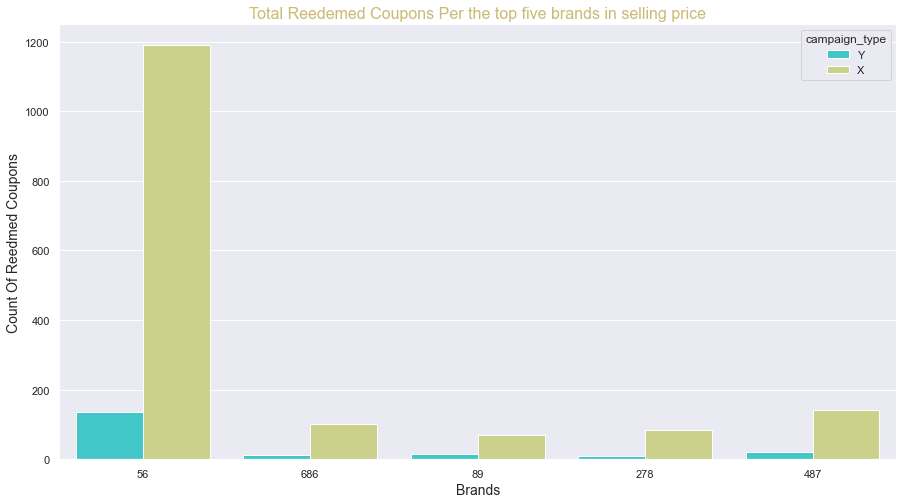

In [142]:
sns.countplot(data=df_top_5,x='brand',hue='campaign_type',order=top_5_brands,palette='rainbow')
plt.ylabel("Count Of Reedmed Coupons",size=14)
plt.xlabel("Brands",size=14)
plt.title("Total Reedemed Coupons Per the top five brands in selling price",size=16, c='y')

#### Q12- <font color='red'>Find how many reedemed coupons at each day at maximum month (in selling) for campaign categories.

In [143]:
df.groupby(by=['campaign_type','month']).sum()['selling_price'].sort_values(ascending=False)
# May is maximum month of total sale for X and Y

campaign_type  month
X              May      3445526.10
               Jun      3236296.75
               Apr      3034446.00
               Mar      2604747.15
               Feb      2497301.20
               Jan      2052414.41
               Jul      1947555.76
               Nov      1928397.21
               Sep      1883280.75
               Aug      1877893.49
               Dec      1819376.20
               Oct      1749136.05
Y              May      1565196.51
               Jun      1419754.85
               Apr      1312221.42
               Feb      1231182.79
               Mar      1166016.14
               Dec       933907.95
               Nov       924429.80
               Jan       901711.79
               Jul       889354.70
               Aug       848842.14
               Sep       839048.12
               Oct       821359.61
Name: selling_price, dtype: float64

In [144]:
may_df=df[(df['redemption_status']==1) & (df['month']=='May')]

In [145]:
print("This Data At May For Each Campaign:")
pd.pivot_table(data=may_df,index='campaign_type',columns='day',values='dummy', aggfunc=sum)

This Data At May For Each Campaign:


day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
campaign_type,,,,,,,,,,,,,,,,,,,,,
X,13.0,51.0,34.0,14.0,16.0,30.0,24.0,24.0,28.0,34.0,...,9.0,17.0,53.0,23.0,12.0,70.0,16.0,21.0,51.0,16.0
Y,1.0,1.0,1.0,1.0,5.0,3.0,6.0,6.0,5.0,5.0,...,1.0,6.0,5.0,1.0,NaN,9.0,NaN,1.0,9.0,NaN


#### Q13- <font color='red'>Show the most income stages [Low-Lower/Middle-Upper/Middle-High Income] attended each campagin.

In [146]:
df.groupby(by=['campaign_type','income_level'])['dummy'].count().sort_values(ascending=False)

campaign_type  income_level
X              Middle-Lower    101898
               Low              68762
Y              Middle-Lower     43342
X              Low-Lower        40305
Y              Low              31282
X              Middle           26048
               Middle_upper     16167
Y              Low-Lower        15593
               Middle           13341
               Middle_upper     11126
X              Hight Income      8725
Y              Hight Income      5725
Name: dummy, dtype: int64

In [147]:
#another solution (Better)
print("The most income stages customers attended each campagin: ")
pd.pivot_table(data=df,index='campaign_type',columns='income_level',values='dummy',aggfunc='count')

The most income stages customers attended each campagin: 


income_level,Hight Income,Low,Low-Lower,Middle,Middle-Lower,Middle_upper
campaign_type,,,,,,
X,8725,68762,40305,26048,101898,16167
Y,5725,31282,15593,13341,43342,11126


Text(0.5, 1.0, 'Total Customers Per Income Bracket')

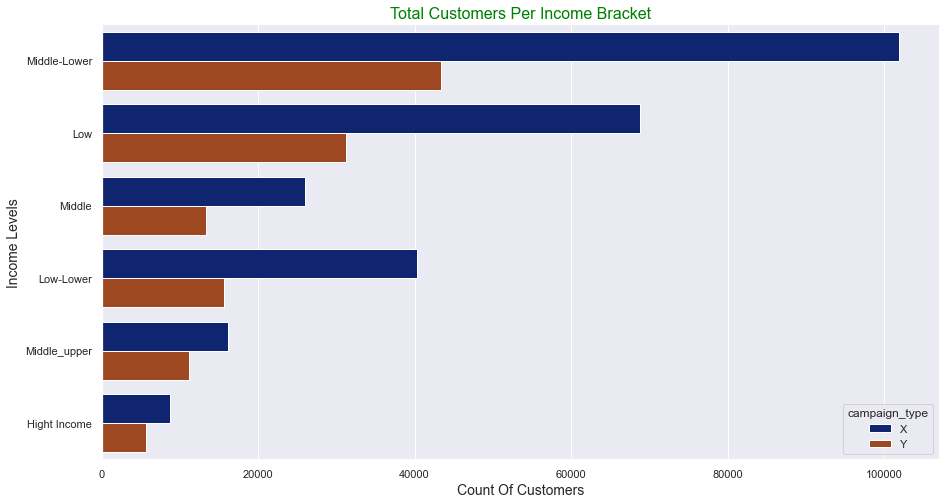

In [148]:
sns.countplot(data=df,y='income_level',hue='campaign_type',palette='dark')
plt.ylabel("Income Levels",size=14)
plt.xlabel("Count Of Customers",size=14)
plt.title("Total Customers Per Income Bracket",size=16, c='green')

#### Q14- <font color='red'>Find the total coupon reedmed and total selling of reedmed coupons for each income stage at each campaign.

In [149]:
df_reedmed=df[df['redemption_status']==1]

In [150]:
print("Total reedmed coupons for each income stage at each campaign: ")
pd.pivot_table(data=df_reedmed,index='campaign_type',columns='income_level',values='dummy',aggfunc='count')

Total reedmed coupons for each income stage at each campaign: 


income_level,Low,Low-Lower,Middle,Middle-Lower,Middle_upper
campaign_type,,,,,
X,990,571,357,3207,427
Y,248,83,32,239,80


In [151]:
print("Total sale for each income stage at each campaign: ")
pd.pivot_table(data=df,index='campaign_type',columns='income_level',values='selling_price',aggfunc=sum)

Total sale for each income stage at each campaign: 


income_level,Hight Income,Low,Low-Lower,Middle,Middle-Lower,Middle_upper
campaign_type,,,,,,
X,1108707.12,7086595.81,4028335.10,2999449.92,10791294.59,2061988.53
Y,699044.39,3206682.12,1543359.06,1496132.93,4572999.73,1334807.59


In [152]:
idx_1=df['income_level'].value_counts().index
idx_1

Index(['Middle-Lower', 'Low', 'Low-Lower', 'Middle', 'Middle_upper',
       'Hight Income'],
      dtype='object')

Text(0.5, 1.0, 'Total Sale For Reedemed Coupons by Income Stage At each campaign.')

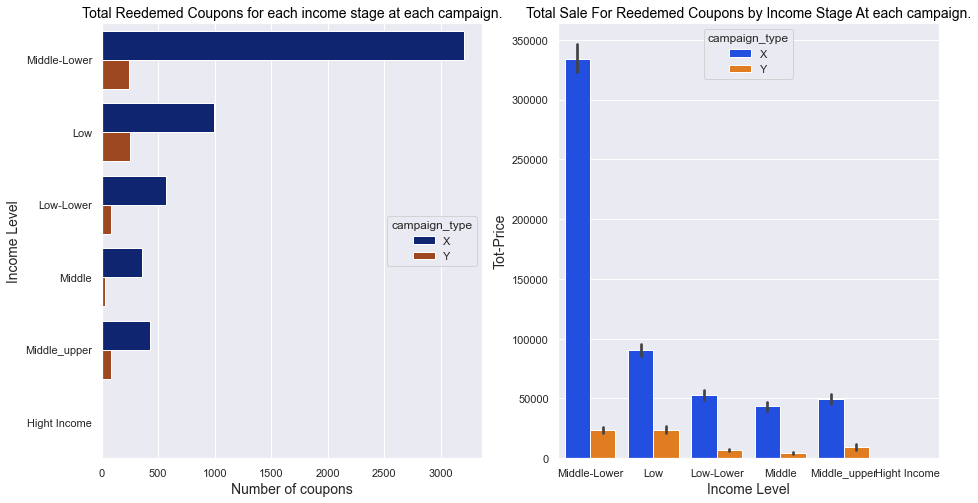

In [153]:
plt.subplot(1,2,1)
sns.countplot(data=df_reedmed,y='income_level',hue='campaign_type',order=idx_1,hue_order=['X','Y'],palette='dark')
plt.ylabel("Income Level",size=14)
plt.xlabel("Number of coupons",size=14)
plt.title("Total Reedemed Coupons for each income stage at each campaign.",size=14, c='black')
plt.subplot(1,2,2)
sns.barplot(data=df_reedmed,x='income_level',y='selling_price',hue='campaign_type',estimator=sum,hue_order=['X','Y'], order=idx_1,palette='bright')
plt.xlabel("Income Level",size=14)
plt.ylabel("Tot-Price",size=14)
plt.title("Total Sale For Reedemed Coupons by Income Stage At each campaign.",size=14, c='black')

#### Q15- <font color='red'>Which coupon (coupon id) discount got the highest total selling price.

In [154]:
top_coupon=df.groupby(by='coupon_id').sum()['selling_price'].sort_values(ascending=False).head(1)
print(f"The most coupon got selling ({top_coupon.index[0]}), And total selling for this coupon = {top_coupon.values[0]}$")

The most coupon got selling (705), And total selling for this coupon = 304189.92$


#### Q16- <font color='red'>The top 3 seasons got the higher reedemed coupons.

In [155]:
idx=df_reedmed['season'].value_counts()
idx

Spring    2276
Summer    1504
Winter    1260
Autumn    1194
Name: season, dtype: int64

Text(0.5, 1.0, 'Total Reedemed Coupons.')

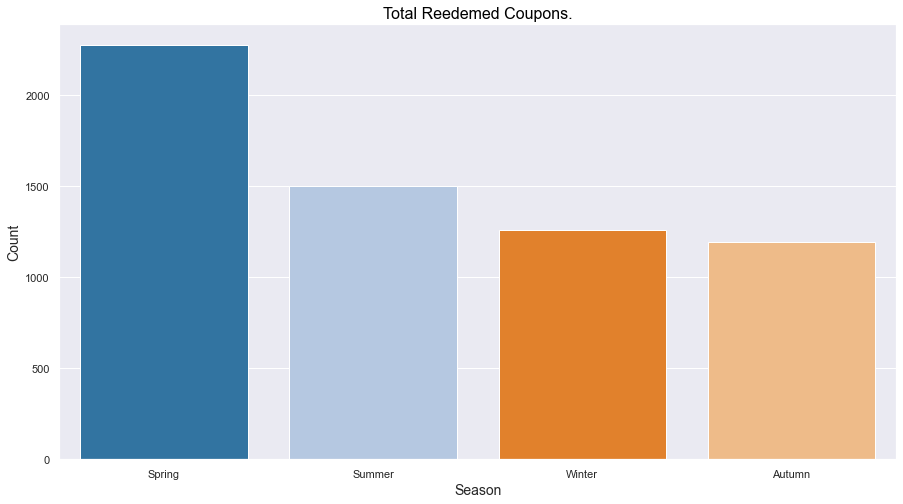

In [156]:
sns.countplot(data=df_reedmed,x='season', order=idx.index, palette='tab20')
plt.xlabel("Season",size=14)
plt.ylabel("Count",size=14)
plt.title("Total Reedemed Coupons.",size=16, c='black')

In [157]:
df.columns

Index(['index', 'id', 'campaign_id', 'coupon_id', 'customer_id',
       'redemption_status', 'age_range', 'rented', 'family_size',
       'income_bracket', 'campaign_type', 'start_date', 'end_date', 'date',
       'item_id', 'quantity', 'selling_price', 'other_discount',
       'coupon_discount', 'brand', 'brand_type', 'category', 'dummy',
       'duration_of_campagin', 'year', 'month', 'day', 'income_level',
       'product_price', 'season'],
      dtype='object')

#### Q16- <font color='red'>Show age range that attend each campaign.

In [158]:
print("Age Range That Attended:")
pd.pivot_table(data=df,index='campaign_type',columns='age_range',values='dummy', aggfunc='count')

Age Range That Attended:


age_range,18-25,26-35,36-45,46-55,56-70,70+
campaign_type,,,,,,
X,13888,45814,68257,99221,17490,17235
Y,4826,26015,34021,44520,6271,4756


Text(0.5, 1.0, 'Total Customers By Their Age.')

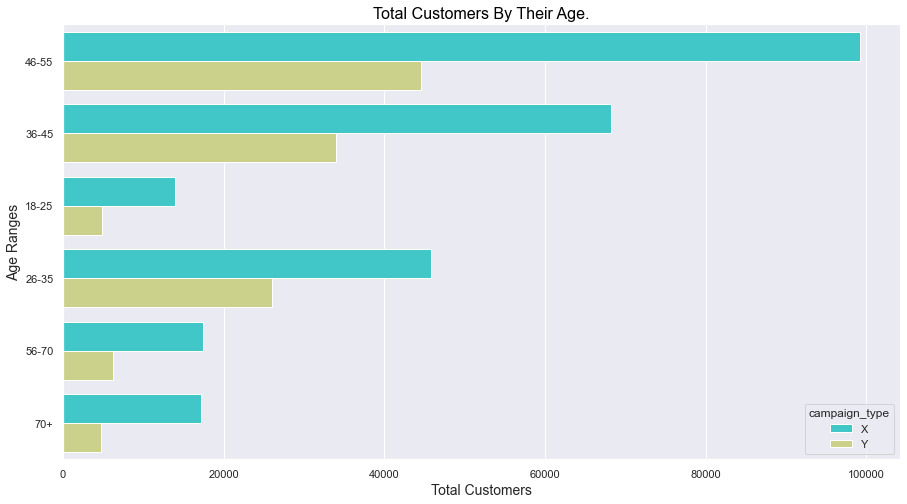

In [159]:
sns.countplot(data=df,y='age_range',hue='campaign_type', palette='rainbow')
plt.xlabel("Total Customers",size=14)
plt.ylabel("Age Ranges",size=14)
plt.title("Total Customers By Their Age.",size=16, c='black')

#### Q17- <font color='red'>Show the top 3 categories of maximum sold items from 46-55 years old customers

In [160]:
df_45_55=df[df['age_range']=='46-55']

In [161]:
print("The Top Three Categories:")
idx=df_45_55['category'].value_counts().head(3)
idx

The Top Three Categories:


Grocery             100615
Pharmaceutical       18019
Natural Products      8300
Name: category, dtype: int64

Text(0.5, 1.0, 'Total Products Sold Over Category - For 45-55 Years Old Customers.')

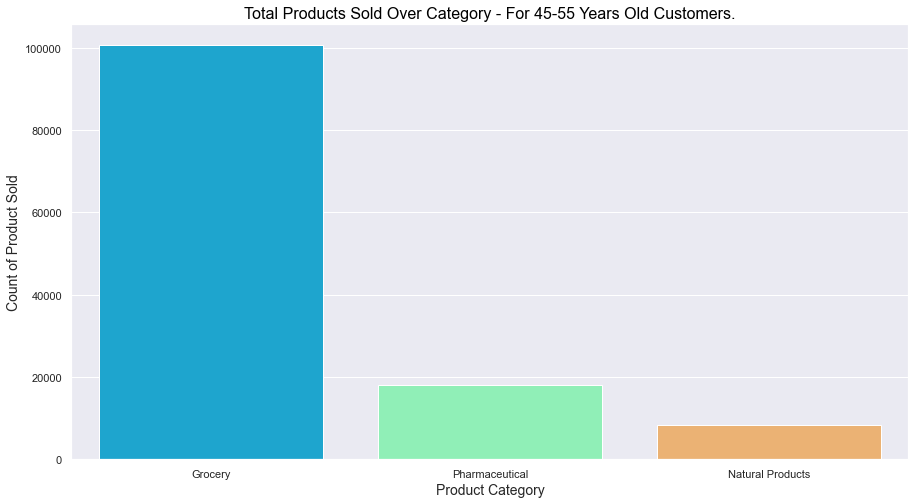

In [162]:
sns.countplot(data=df_45_55[df_45_55.isin(idx.index)],x='category', order=idx.index, palette='rainbow')
plt.xlabel("Product Category",size=14)
plt.ylabel("Count of Product Sold",size=14)
plt.title("Total Products Sold Over Category - For 45-55 Years Old Customers.",size=16, c='black')

#### Q18- <font color='red'> Show the total coupon discounts for each category in each campaign

In [163]:
pd.pivot_table(data=df,index='campaign_type',columns='category',values='coupon_discount',aggfunc=sum)

category,Alcohol,Bakery,"Dairy, Juices & Snacks",Flowers & Plants,Garden,Grocery,Meat,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Restauarant,Seafood,Skin & Hair Care,Travel
campaign_type,,,,,,,,,,,,,,,
X,0.0,-1155.81,-1781.00,0.0,0.0,-130939.16,0.0,-374.01,0.0,-88654.01,0.0,0.0,0.0,0.0,0.0
Y,0.0,-411.39,-854.88,0.0,0.0,-63069.27,0.0,0.00,0.0,-37857.76,0.0,0.0,0.0,0.0,0.0


In [164]:
idx=df['category'].value_counts().index

Text(0.5, 1.0, 'Total Coupon Discounts For Each Category In Each Campaign')

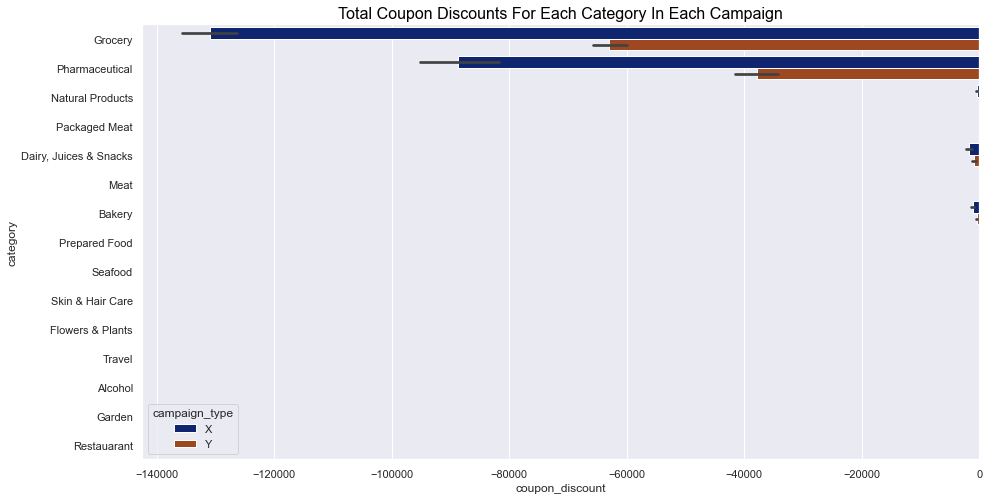

In [165]:
sns.barplot(data=df,x='coupon_discount',y='category',hue='campaign_type', estimator=sum,order=idx,palette='dark')
plt.title("Total coupon discounts for each category in each campaign".title(),size=16,c='black')

#### Q19- <font color='red'> Show the Four most and least coupons used in both campaigns

In [166]:
print("The Top 4 Coupons Used:")
df['coupon_id'].value_counts().sort_values(ascending=False).head(4)

The Top 4 Coupons Used:


705     2851
470     2309
1043    2244
691     2066
Name: coupon_id, dtype: int64

In [167]:
idx_1=df['coupon_id'].value_counts().sort_values(ascending=False).head(4).index

In [168]:
print("The Less 4 Coupons Used:")
df['coupon_id'].value_counts().sort_values(ascending=False).tail(4)

The Less 4 Coupons Used:


1026    53
312     53
847     53
546     52
Name: coupon_id, dtype: int64

In [169]:
idx_2=df['coupon_id'].value_counts().sort_values(ascending=False).tail(4).index
idx_2

Index(['1026', '312', '847', '546'], dtype='object')

In [170]:
df_top_2=df[df['coupon_id'].isin(idx_1)]
df_top_2

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,...,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price,season
315,315,66335,9,705,205,0,46-55,0,2,7,...,Established,Pharmaceutical,1,1.05,2012,Jul,14,Middle,35.260000,Summer
316,316,66335,9,705,205,0,46-55,0,2,7,...,Established,Grocery,1,1.05,2012,Aug,1,Middle,56.640000,Summer
317,317,66335,9,705,205,0,46-55,0,2,7,...,Established,Pharmaceutical,1,1.05,2012,May,14,Middle,35.265000,Spring
318,318,66335,9,705,205,0,46-55,0,2,7,...,Established,Pharmaceutical,1,1.05,2012,Nov,21,Middle,11.873333,Autumn
319,319,66335,9,705,205,0,46-55,0,2,7,...,Local,Natural Products,1,1.05,2012,Aug,29,Middle,106.500000,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380831,386243,118435,30,1043,1256,0,36-45,0,1,4,...,Established,Grocery,1,1.51,2012,Jan,18,Low,99.380000,Winter
381822,387268,20144,30,1043,1379,0,36-45,0,1,3,...,Established,Pharmaceutical,1,1.51,2012,Nov,9,Low,231.170000,Autumn
381823,387269,20144,30,1043,1379,0,36-45,0,1,3,...,Established,Grocery,1,1.51,2013,Apr,14,Low,45.950000,Spring
381824,387270,20144,30,1043,1379,0,36-45,0,1,3,...,Established,Prepared Food,1,1.51,2013,Apr,11,Low,133.570000,Spring


In [171]:
df_least_2=df[df['coupon_id'].isin(idx_2)]
df_least_2

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,...,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price,season
21884,21977,89808,26,546,72,0,26-35,0,3,1,...,Local,Grocery,1,1.31,2013,Feb,11,Low-Lower,70.88,Winter
21885,21978,89808,26,546,72,0,26-35,0,3,1,...,Established,Grocery,1,1.31,2013,Jan,24,Low-Lower,124.31,Winter
21886,21979,89808,26,546,72,0,26-35,0,3,1,...,Established,Grocery,1,1.31,2013,May,14,Low-Lower,73.38,Spring
21887,21980,89808,26,546,72,0,26-35,0,3,1,...,Local,Grocery,1,1.31,2012,Nov,2,Low-Lower,56.64,Autumn
21888,21981,89808,26,546,72,0,26-35,0,3,1,...,Established,Grocery,1,1.31,2012,Apr,13,Low-Lower,131.44,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362271,367624,82384,1,312,797,0,46-55,0,1,6,...,Local,Seafood,1,1.22,2012,May,24,Middle-Lower,248.98,Spring
362272,367625,82384,1,312,797,0,46-55,0,1,6,...,Established,Grocery,1,1.22,2012,Jan,19,Middle-Lower,149.25,Winter
362273,367626,82384,1,312,797,0,46-55,0,1,6,...,Established,Pharmaceutical,1,1.22,2013,Jan,21,Middle-Lower,70.88,Winter
362274,367627,82384,1,312,797,0,46-55,0,1,6,...,Established,Grocery,1,1.22,2013,Jan,25,Middle-Lower,81.57,Winter


Text(0.5, 1.0, 'Total Count Of Least Four Coupons Used')

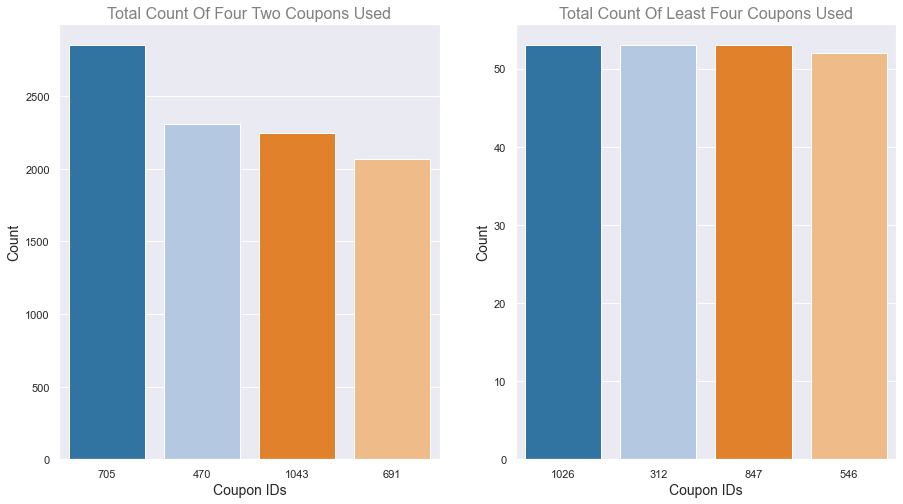

In [172]:
plt.subplot(1,2,1)
sns.countplot(data=df_top_2,x='coupon_id',palette='tab20',order=idx_1)
plt.xlabel("Coupon IDs",size=14)
plt.ylabel("Count",size=14)
plt.title("Total Count Of Four Two Coupons Used".title(),size=16, c='gray')
plt.subplot(1,2,2)
sns.countplot(data=df_least_2,x='coupon_id',palette='tab20', order=idx_2)
plt.xlabel("Coupon IDs",size=14)
plt.ylabel("Count",size=14)
plt.title("Total Count Of Least Four Coupons Used".title(),size=16, c='gray')

#### Q20- <font color='red'> Show the quantity of item sold for each top 10 coupons in selling price at each campaign. 

In [173]:
top10_coupons=df.groupby(by='coupon_id')['selling_price'].sum().sort_values(ascending=False).head(10).index
top10_coupons

Index(['705', '470', '1043', '691', '431', '658', '689', '279', '934', '759'], dtype='object', name='coupon_id')

In [174]:
df_10_top=df[df['coupon_id'].isin(top10_coupons)]
df_10_top

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,...,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price,season
315,315,66335,9,705,205,0,46-55,0,2,7,...,Established,Pharmaceutical,1,1.05,2012,Jul,14,Middle,35.260000,Summer
316,316,66335,9,705,205,0,46-55,0,2,7,...,Established,Grocery,1,1.05,2012,Aug,1,Middle,56.640000,Summer
317,317,66335,9,705,205,0,46-55,0,2,7,...,Established,Pharmaceutical,1,1.05,2012,May,14,Middle,35.265000,Spring
318,318,66335,9,705,205,0,46-55,0,2,7,...,Established,Pharmaceutical,1,1.05,2012,Nov,21,Middle,11.873333,Autumn
319,319,66335,9,705,205,0,46-55,0,2,7,...,Local,Natural Products,1,1.05,2012,Aug,29,Middle,106.500000,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380831,386243,118435,30,1043,1256,0,36-45,0,1,4,...,Established,Grocery,1,1.51,2012,Jan,18,Low,99.380000,Winter
381822,387268,20144,30,1043,1379,0,36-45,0,1,3,...,Established,Pharmaceutical,1,1.51,2012,Nov,9,Low,231.170000,Autumn
381823,387269,20144,30,1043,1379,0,36-45,0,1,3,...,Established,Grocery,1,1.51,2013,Apr,14,Low,45.950000,Spring
381824,387270,20144,30,1043,1379,0,36-45,0,1,3,...,Established,Prepared Food,1,1.51,2013,Apr,11,Low,133.570000,Spring


In [175]:
print("quantity of item sold for each top 10 coupons in selling price at each campaign:".title())
pd.pivot_table(data=df_10_top,index='campaign_type',columns='coupon_id',values='quantity', aggfunc=sum)

Quantity Of Item Sold For Each Top 10 Coupons In Selling Price At Each Campaign:


coupon_id,1043,279,431,470,658,689,691,705,759,934
campaign_type,,,,,,,,,,
X,509.0,NaN,181.0,1811.0,640.0,NaN,122.0,1430.0,590.0,NaN
Y,2417.0,2417.0,2417.0,1155.0,1895.0,2447.0,2522.0,2285.0,1895.0,2417.0


Text(0.5, 1.0, 'Total Quantities For Each Coupon')

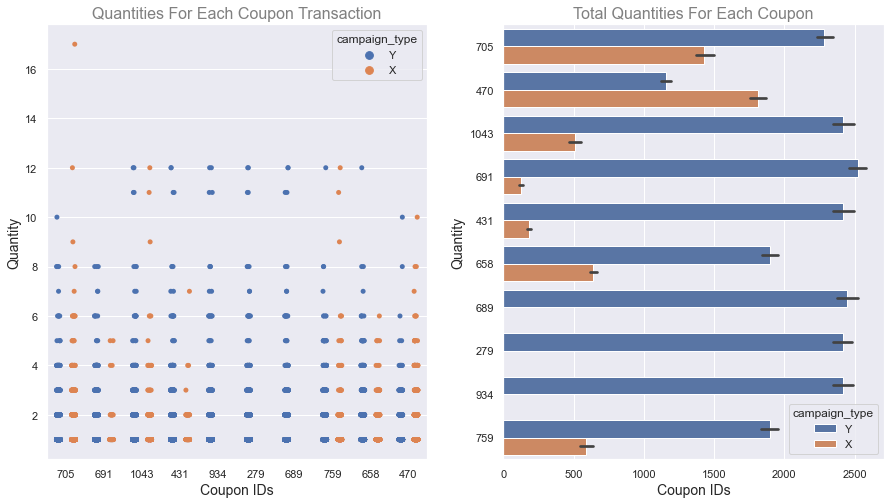

In [176]:
plt.subplot(1,2,1)
sns.stripplot(data=df_10_top,x='coupon_id',y='quantity', hue='campaign_type' ,dodge=True)
plt.xlabel("Coupon IDs",size=14)
plt.ylabel("Quantity",size=14)
plt.title("Quantities for each coupon transaction".title(),size=16, c='gray')
plt.subplot(1,2,2)
sns.barplot(data=df_10_top,y='coupon_id',x='quantity',hue='campaign_type',estimator=sum, order=top10_coupons)
plt.xlabel("Coupon IDs",size=14)
plt.ylabel("Quantity",size=14)
plt.title("total Quantities for each coupon".title(),size=16, c='gray')

#### Q21- <font color='red'> Find the category and brand type that made higher quantity for each campaign.  top 5(category)

In [177]:
print("the category and brand type that made higher quantity for each campaign:-".title())
df.groupby(by=['campaign_type','category','brand_type']).sum()['quantity'].sort_values(ascending=False).head(2)

The Category And Brand Type That Made Higher Quantity For Each Campaign:-


campaign_type  category  brand_type 
X              Grocery   Established    177042
Y              Grocery   Established     79744
Name: quantity, dtype: int64

In [178]:
print("the category and brand type that made higher quantity for each campaign:-".title())
pd.pivot_table(data=df,index=['campaign_type','brand_type'],columns='category',values='quantity',aggfunc=sum)

The Category And Brand Type That Made Higher Quantity For Each Campaign:-


category                   Alcohol  Bakery  Dairy, Juices & Snacks  \
campaign_type brand_type                                             
X             Established     95.0  3703.0                  5511.0   
              Local            NaN  1864.0                   185.0   
Y             Established     53.0  1441.0                  3083.0   
              Local            NaN   916.0                    61.0   

category                   Flowers & Plants  Garden   Grocery    Meat  \
campaign_type brand_type                                                
X             Established             673.0    90.0  177042.0  5294.0   
              Local                    68.0     NaN   73322.0   588.0   
Y             Established             386.0   155.0   79744.0  2154.0   
              Local                    29.0     NaN   31550.0   206.0   

category                   Natural Products  Packaged Meat  Pharmaceutical  \
campaign_type brand_type                                                     
X             Established           13498.0        12501.0         34542.0   
              Local                  1935.0         3833.0          4003.0   
Y             Established            7009.0         5359.0         17080.0   
              Local                   764.0         1450.0          1720.0   

category                   Prepared Food  Restauarant  Seafood  \
campaign_type brand_type                                         
X             Established         1953.0         15.0    629.0   
              Local                814.0          NaN    983.0   
Y             Established          910.0         18.0    150.0   
              Local                412.0          NaN    426.0   

category                   Skin & Hair Care  Travel  
campaign_type brand_type                             
X             Established            1000.0    79.0  
              Local                    24.0     NaN  
Y             Established             399.0    81.0  
              Local                     NaN     NaN

In [179]:
df_campagin_x=df[df['campaign_type']=='X']
df_campagin_y=df[df['campaign_type']=='Y']
idx_x=df_campagin_x['category'].value_counts().head(5).index
idx_y=df_campagin_y['category'].value_counts().head(5).index
print(idx_x,idx_y)

Index(['Grocery', 'Pharmaceutical', 'Packaged Meat', 'Natural Products',
       'Meat'],
      dtype='object') Index(['Grocery', 'Pharmaceutical', 'Natural Products', 'Packaged Meat',
       'Dairy, Juices & Snacks'],
      dtype='object')


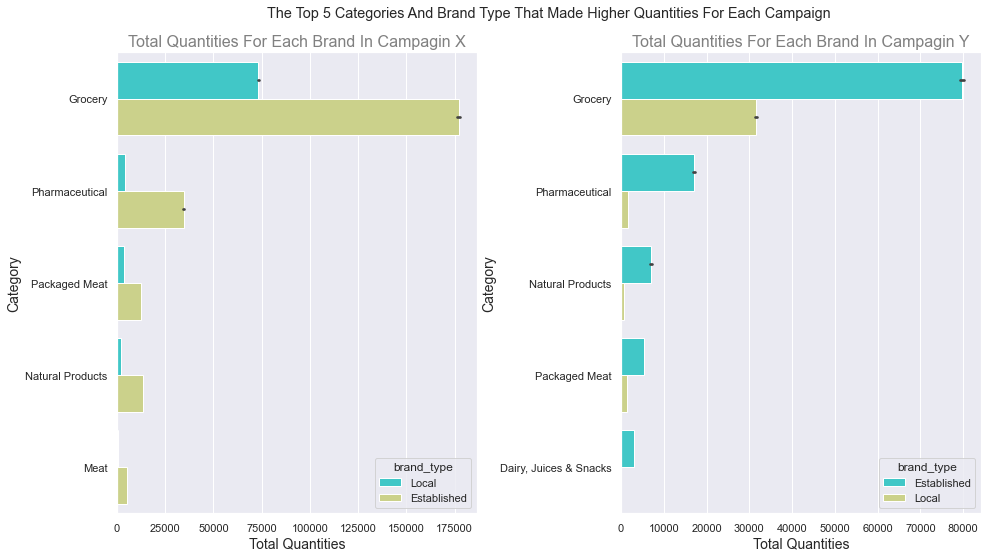

In [180]:
plt.suptitle("the top 5 categories and brand type that made higher quantities for each campaign".title())
plt.subplot(1,2,1)
sns.barplot(data=df_campagin_x[df_campagin_x['category'].isin(idx_x)],x='quantity',y='category', hue='brand_type' ,estimator=sum,dodge=True,palette="rainbow", order=idx_x)
plt.xlabel("Total Quantities",size=14)
plt.ylabel("Category",size=14)
plt.title("Total Quantities for each brand in campagin X".title(),size=16, c='gray')
plt.subplot(1,2,2)
sns.barplot(data=df_campagin_y[df_campagin_y['category'].isin(idx_y)] ,x='quantity', y='category', hue='brand_type' ,estimator=sum,dodge=True, palette="rainbow",order=idx_y)
plt.xlabel("Total Quantities",size=14)
plt.ylabel("Category",size=14)
plt.title("Total Quantities for each brand in campagin Y".title(),size=16, c='gray')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

#### Q22- <font color='red'>Find the top 20 coupon ids per brand that made a higher discounts for campaign X.


In [181]:
df_campagin_x

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,...,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price,season
0,0,1,13,27,1053,0,46-55,0,1,5,...,Local,Grocery,1,1.54,2013,Jun,11,Middle-Lower,42.39,Summer
1,1,1,13,27,1053,0,46-55,0,1,5,...,Local,Natural Products,1,1.54,2012,Jun,24,Middle-Lower,106.50,Summer
2,2,2444,13,513,1053,0,46-55,0,1,5,...,Local,Grocery,1,1.54,2013,Jun,11,Middle-Lower,42.39,Summer
3,3,2444,13,513,1053,0,46-55,0,1,5,...,Local,Natural Products,1,1.54,2012,Jun,24,Middle-Lower,106.50,Summer
4,4,3651,13,166,1053,0,46-55,0,1,5,...,Local,Grocery,1,1.54,2013,Jun,11,Middle-Lower,42.39,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382309,387755,93307,26,769,507,0,70+,0,2,6,...,Established,Prepared Food,1,1.31,2013,Jun,23,Middle-Lower,74.80,Summer
382310,387756,104124,26,468,507,0,70+,0,2,6,...,Established,Prepared Food,1,1.31,2013,Jun,23,Middle-Lower,74.80,Summer
382311,387757,114906,26,947,507,0,70+,0,2,6,...,Established,Prepared Food,1,1.31,2013,Jun,23,Middle-Lower,74.80,Summer
382312,387758,118711,26,2,507,0,70+,0,2,6,...,Established,Prepared Food,1,1.31,2013,Jun,23,Middle-Lower,74.80,Summer


In [182]:
print("top twenty coupon ids got high discounts per brand:-".title())
df.groupby(by=['brand','coupon_id']).sum()['coupon_discount'].sort_values(ascending=True).head(20)

Top Twenty Coupon Ids Got High Discounts Per Brand:-


brand  coupon_id
686    658         -730.20
       1043        -650.04
       694         -525.39
       494         -516.49
       773         -498.68
482    744         -498.68
686    726         -480.87
       824         -445.24
       691         -432.77
       73          -409.63
       248         -409.63
       293         -400.72
       744         -382.91
       431         -382.89
       407         -356.19
       279         -356.18
       934         -356.18
       689         -356.18
       1007        -345.50
       963         -338.39
Name: coupon_discount, dtype: float64

In [183]:
idx=df.groupby(by=['brand','coupon_id']).sum()['coupon_discount'].sort_values(ascending=True).head(20).index
idx

MultiIndex([('686',  '658'),
            ('686', '1043'),
            ('686',  '694'),
            ('686',  '494'),
            ('686',  '773'),
            ('482',  '744'),
            ('686',  '726'),
            ('686',  '824'),
            ('686',  '691'),
            ('686',   '73'),
            ('686',  '248'),
            ('686',  '293'),
            ('686',  '744'),
            ('686',  '431'),
            ('686',  '407'),
            ('686',  '279'),
            ('686',  '934'),
            ('686',  '689'),
            ('686', '1007'),
            ('686',  '963')],
           names=['brand', 'coupon_id'])

In [184]:
idx_coupons=[]
idx_brands=[]
for i,j in idx:
    idx_coupons.append(j)
    idx_brands.append(i)
print(idx_coupons,idx_brands)

['658', '1043', '694', '494', '773', '744', '726', '824', '691', '73', '248', '293', '744', '431', '407', '279', '934', '689', '1007', '963'] ['686', '686', '686', '686', '686', '482', '686', '686', '686', '686', '686', '686', '686', '686', '686', '686', '686', '686', '686', '686']


In [185]:
df_top_2brands_coupons=df[(df['coupon_id'].isin(idx_coupons)) & (df['brand'].isin(idx_brands))]
df_top_2brands_coupons

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,...,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price,season
77,77,34573,13,744,48,0,36-45,0,2,3,...,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.51,Spring
13186,13186,104409,8,658,1152,0,46-55,0,3,10,...,Established,Grocery,1,1.58,2012,Oct,2,Middle_upper,142.12,Autumn
13282,13282,43318,5,934,1152,0,46-55,0,3,10,...,Established,Grocery,1,1.12,2012,Oct,2,Middle_upper,142.12,Autumn
13314,13314,78039,5,431,1152,0,46-55,0,3,10,...,Established,Grocery,1,1.12,2012,Oct,2,Middle_upper,142.12,Autumn
13346,13346,79625,5,689,1152,0,46-55,0,3,10,...,Established,Grocery,1,1.12,2012,Oct,2,Middle_upper,142.12,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378664,384076,104520,10,431,52,0,36-45,0,5+,7,...,Established,Pharmaceutical,1,1.05,2012,Apr,20,Middle,95.46,Spring
378678,384090,105287,10,689,52,0,36-45,0,5+,7,...,Established,Pharmaceutical,1,1.05,2012,Apr,20,Middle,95.46,Spring
378720,384132,117816,10,1043,52,0,36-45,0,5+,7,...,Established,Pharmaceutical,1,1.05,2012,Apr,20,Middle,95.46,Spring
379174,384586,76976,28,407,1337,0,36-45,0,5+,6,...,Established,Pharmaceutical,1,2.00,2012,Aug,14,Middle-Lower,95.46,Summer


In [186]:
print("top twenty coupon ids got high discounts per brand:-".title())
pd.pivot_table(data=df_top_2brands_coupons,index='brand',columns='coupon_id',values='coupon_discount',aggfunc=sum)

Top Twenty Coupon Ids Got High Discounts Per Brand:-


coupon_id,1007,1043,248,279,293,407,431,494,658,689,691,694,726,73,744,773,824,934,963
brand,,,,,,,,,,,,,,,,,,,
482,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.0,0.00,0.00,-142.48,0.00,0.00,-498.68,0.00,0.00,0.00,NaN
686,-345.5,-650.04,-409.63,-356.18,-400.72,-356.19,-382.89,-516.49,-730.2,-356.18,-432.77,-525.39,-480.87,-409.63,-382.91,-498.68,-445.24,-356.18,-338.39


Text(0.5, 1.0, 'Top Twenty Coupon Ids Got High Discounts Per Brand:-')

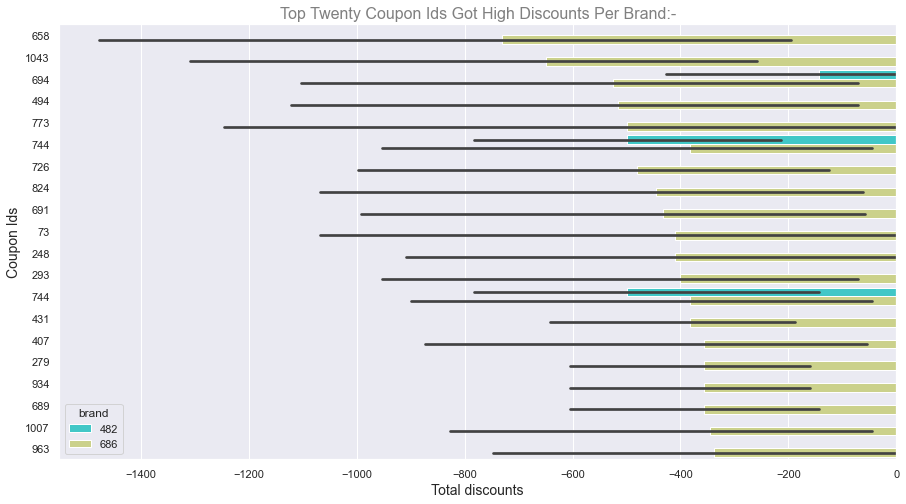

In [187]:
sns.barplot(data=df_top_2brands_coupons,y='coupon_id',hue='brand',x='coupon_discount',estimator=sum, order=idx_coupons, palette='rainbow',dodge=True)
plt.xlabel("Total discounts",size=14)
plt.ylabel("Coupon Ids",size=14)
plt.title("top twenty coupon ids got high discounts per brand:-".title(),size=16, c='gray')

#### Q23- <font color='red'>Show the total selling using coupons in each day of campagin x that start date and end date (2013-05-19---2013-07-05) - show same whether using coupons or not

In [188]:
df_q23=df[(df['start_date']=='2013-05-19') & (df['end_date']=='2013-07-05')&(df['coupon_discount']!=0) & (df['redemption_status']==1) &(df['date']>df['start_date']) & (df['date']<df['end_date'])]
df_q23['coupon_discount'].value_counts()

-35.62    16
-17.81    11
-19.59     5
-14.25     3
-10.69     3
-71.24     3
Name: coupon_discount, dtype: int64

In [189]:
df_q23=df[(df['start_date']=='2013-05-19') & (df['end_date']=='2013-07-05') & (df['redemption_status']==1) &(df['date']>df['start_date']) & (df['date']<df['end_date'])]
df_q23['end_date'].unique()

array(['2013-07-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [190]:
print("total-selling using coupons in each day of campaign x:-".title())
pd.pivot_table(data=df_q23,columns='day',index='month',values='selling_price',aggfunc=sum)

Total-Selling Using Coupons In Each Day Of Campaign X:-


day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
Jul,NaN,35.62,230.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jun,106.86,NaN,374.74,115.4,325.92,383.64,664.31,284.96,858.07,334.12,...,44.52,279.98,838.85,NaN,589.52,522.54,1097.47,2868.13,NaN,NaN
May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,194.83,697.08,1375.26,3521.37,426.72,351.57,734.83,1715.43,1415.9,267.15


In [191]:
print("total-selling in each day using coupons of campaign x ".title())
df_q23.groupby(by=['month','day']).sum()['selling_price']

Total-Selling In Each Day Using Coupons Of Campaign X 


month  day
Jul    2        35.62
       3       230.81
Jun    1       106.86
       3       374.74
       4       115.40
       5       325.92
       6       383.64
       7       664.31
       8       284.96
       9       858.07
       10      334.12
       11      292.08
       12     1058.96
       13      840.29
       14     1584.75
       15      419.24
       16     1591.48
       17     1368.85
       18      387.56
       19     1193.60
       21      287.45
       22       44.52
       23      279.98
       24      838.85
       26      589.52
       27      522.54
       28     1097.47
       29     2868.13
May    20      460.93
       22      194.83
       23      697.08
       24     1375.26
       25     3521.37
       26      426.72
       27      351.57
       28      734.83
       29     1715.43
       30     1415.90
       31      267.15
Name: selling_price, dtype: float64

In [192]:
df_whether=df[(df['start_date']=='2013-05-19') & (df['end_date']=='2013-07-05') &(df['date']>df['start_date']) & (df['date']<df['end_date'])]
df_whether

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,...,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price,season
0,0,1,13,27,1053,0,46-55,0,1,5,...,Local,Grocery,1,1.54,2013,Jun,11,Middle-Lower,42.39,Summer
2,2,2444,13,513,1053,0,46-55,0,1,5,...,Local,Grocery,1,1.54,2013,Jun,11,Middle-Lower,42.39,Summer
4,4,3651,13,166,1053,0,46-55,0,1,5,...,Local,Grocery,1,1.54,2013,Jun,11,Middle-Lower,42.39,Summer
6,6,7712,13,766,1053,0,46-55,0,1,5,...,Local,Grocery,1,1.54,2013,Jun,11,Middle-Lower,42.39,Summer
8,8,15317,13,165,1053,0,46-55,0,1,5,...,Local,Grocery,1,1.54,2013,Jun,11,Middle-Lower,42.39,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359931,365194,121767,13,542,447,0,36-45,0,2,5,...,Established,Grocery,1,1.54,2013,Jun,3,Middle-Lower,192.00,Summer
359932,365195,121767,13,542,447,0,36-45,0,2,5,...,Local,Grocery,1,1.54,2013,Jun,18,Middle-Lower,37.40,Summer
359935,365198,121914,13,909,447,0,36-45,0,2,5,...,Established,Grocery,1,1.54,2013,May,29,Middle-Lower,70.88,Spring
359942,365205,121914,13,909,447,0,36-45,0,2,5,...,Established,Grocery,1,1.54,2013,Jun,3,Middle-Lower,192.00,Summer


In [193]:
print("total-selling in each day of campaign x:-".title())
pd.pivot_table(data=df_whether,columns='day',index='month',values='selling_price',aggfunc=sum)

Total-Selling In Each Day Of Campaign X:-


day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
Jul,16476.05,23561.19,13859.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jun,4990.22,6149.61,19971.92,2636.5,13425.47,41665.8,36393.87,17329.31,44851.64,23092.44,...,18462.09,22071.94,16997.91,18940.44,38873.79,18553.66,28265.80,47785.86,12188.46,NaN
May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14946.71,36521.35,15198.75,42797.95,21262.18,19432.83,26930.18,27806.99,29790.51,20755.36


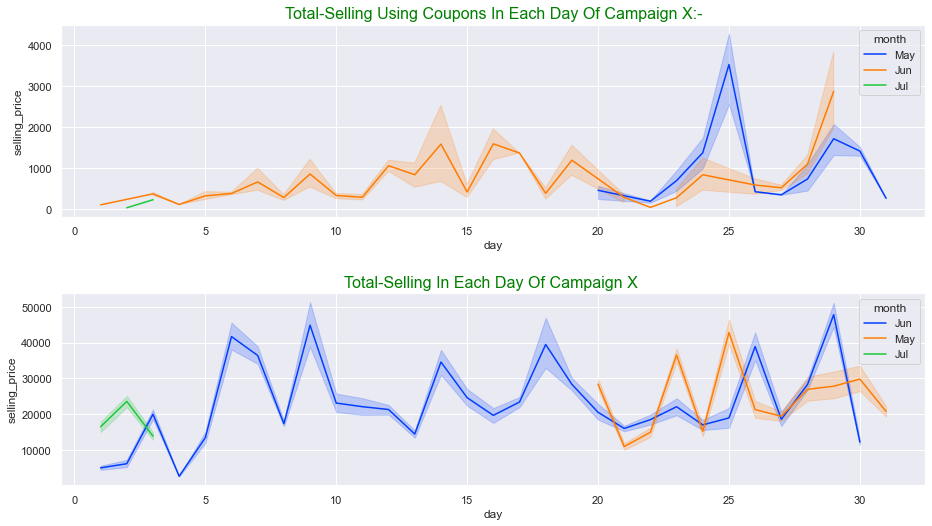

In [194]:
plt.subplot(2,1,1)
sns.lineplot(data=df_q23,x='day',y='selling_price',hue='month',estimator=sum, palette='bright')
plt.title("total-selling using coupons in each day of campaign x:-".title(),size=16,color='green')
plt.subplot(2,1,2)
sns.lineplot(data=df_whether,x='day',y='selling_price',hue='month',estimator=sum, palette='bright')
plt.title("total-selling in each day of campaign x ".title(),size=16,color='green')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

#### Q24-<font color='red'> Show the start and end dates of each camapign , then show total selling per day in each campagin of reedmed coupons 

In [195]:
dates_campaigns=df.groupby(by=['campaign_type','start_date','end_date']).sum()['selling_price'].sort_values(ascending=False).index
dates_campaigns

MultiIndex([('X', '2013-05-19', '2013-07-05'),
            ('X', '2013-02-16', '2013-04-05'),
            ('X', '2012-08-12', '2012-09-21'),
            ('X', '2012-11-19', '2013-01-04'),
            ('Y', '2012-10-08', '2012-11-30'),
            ('Y', '2013-04-22', '2013-06-07'),
            ('Y', '2013-03-11', '2013-04-12'),
            ('Y', '2013-04-22', '2013-05-24'),
            ('Y', '2013-01-12', '2013-02-15'),
            ('Y', '2013-04-08', '2013-05-10'),
            ('Y', '2013-02-02', '2013-03-08'),
            ('Y', '2013-01-07', '2013-02-08'),
            ('Y', '2012-09-16', '2012-11-16'),
            ('Y', '2012-12-22', '2013-02-16'),
            ('Y', '2012-08-25', '2012-10-27'),
            ('Y', '2012-12-17', '2013-01-18'),
            ('Y', '2013-01-28', '2013-03-01'),
            ('Y', '2012-12-12', '2013-01-18')],
           names=['campaign_type', 'start_date', 'end_date'])

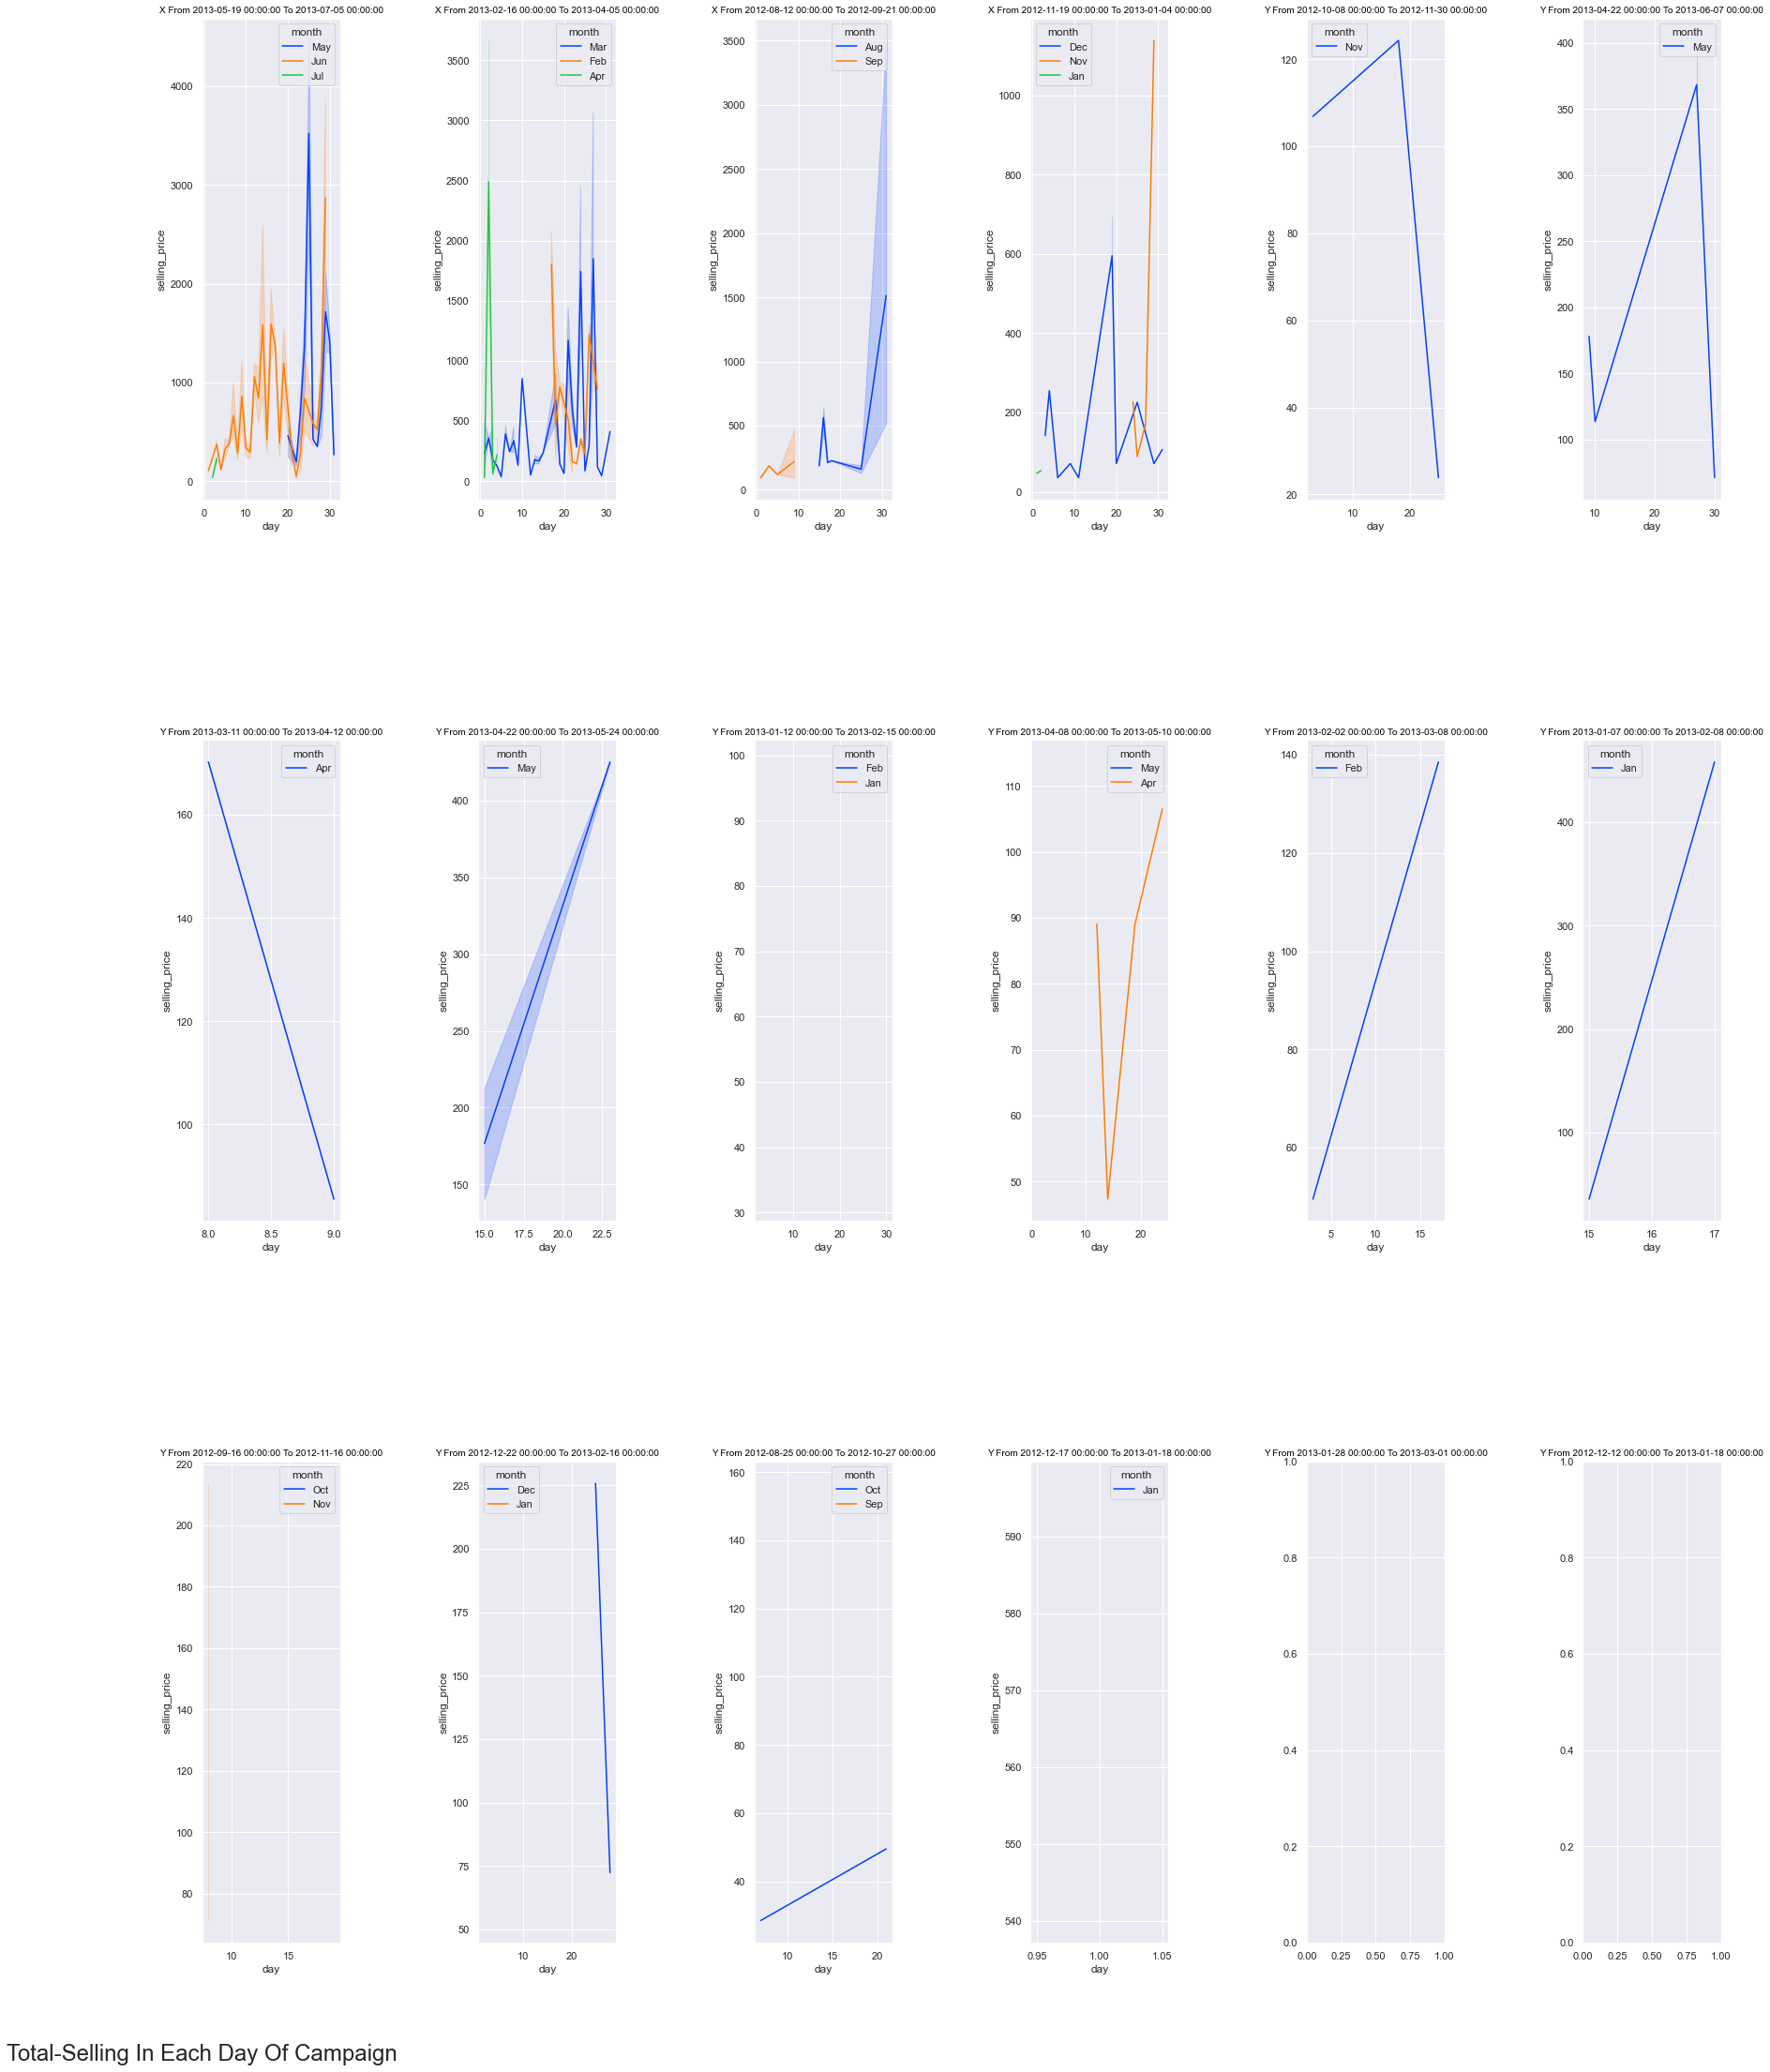

In [196]:
# total selling in each campagin uses coupons
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("total-selling in each day of campaign".title(), fontsize=24,x=0 ,y=0)
for i,idx in enumerate(dates_campaigns.values):
    plt.subplot(3,6,i+1)
    temp=df[(df['start_date']==idx[1]) & (df['end_date']==idx[2])&(df['campaign_type']==idx[0]) &(df['redemption_status']==1) & (df['date']>df['start_date']) & (df['date']<df['end_date'])]
    sns.lineplot(data=temp,x='day',y='selling_price',hue='month',estimator=sum, palette='bright')
    plt.title(f"{idx[0]} From {idx[1]} to {idx[2]}".title(),size=10,color='black')
plt.subplots_adjust(left=0,bottom=0.1,right=1.5,top=2,wspace=1,hspace=0.5)
plt.show()

#### Q25- <font color='red'>Show the total quantity that have been sold for each category in each campaigns

In [197]:
print("total quantity that have been sold for each category in each campaigns:-".title())
pd.pivot_table(data=df,index='campaign_type',columns='category',values='quantity',aggfunc=sum)

Total Quantity That Have Been Sold For Each Category In Each Campaigns:-


category,Alcohol,Bakery,"Dairy, Juices & Snacks",Flowers & Plants,Garden,Grocery,Meat,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Restauarant,Seafood,Skin & Hair Care,Travel
campaign_type,,,,,,,,,,,,,,,
X,95,5567,5696,741,90,250364,5882,15433,16334,38545,2767,15,1612,1024,79
Y,53,2357,3144,415,155,111294,2360,7773,6809,18800,1322,18,576,399,81


In [198]:
idx=df['category'].value_counts().index
idx

Index(['Grocery', 'Pharmaceutical', 'Natural Products', 'Packaged Meat',
       'Dairy, Juices & Snacks', 'Meat', 'Bakery', 'Prepared Food', 'Seafood',
       'Skin & Hair Care', 'Flowers & Plants', 'Travel', 'Alcohol', 'Garden',
       'Restauarant'],
      dtype='object')

Text(0.5, 1.0, 'Total Quantity That Have Been Sold For Each Category In Each Campaign')

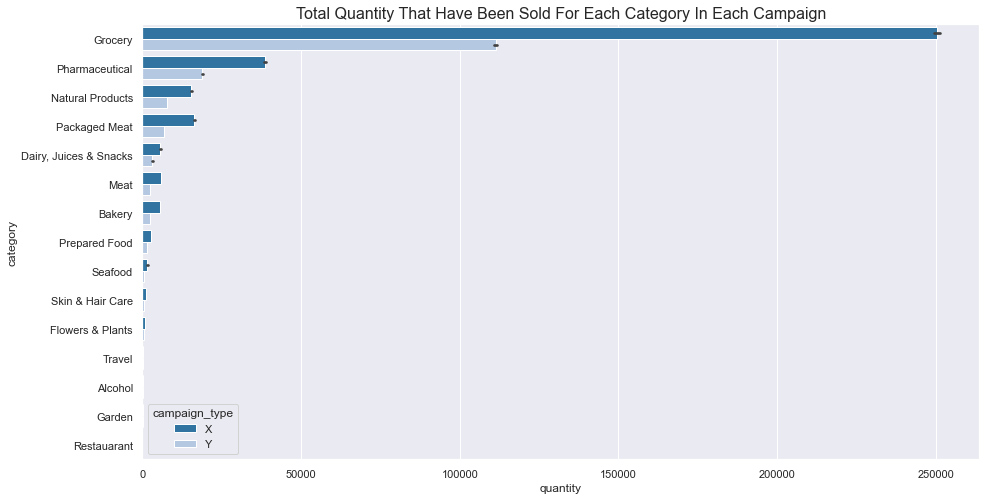

In [199]:
sns.barplot(data=df,y='category',x='quantity',hue='campaign_type',estimator=sum,palette='tab20',order=idx)
plt.title("total quantity that have been sold for each category in each campaign".title(),size=16)

#### Q26- <font color='red'>Show how many coupons have been reedemed without any coupon discount at each of the top 30 expensive products brand and their category.

In [200]:
#this dataframe is reedmed coupon with 0 discount on it 
df_zero_discounts=df[(df['redemption_status']==1) & (df['coupon_discount']==0)]
df_zero_discounts

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,...,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price,season
252,252,11043,9,607,205,1,46-55,0,2,7,...,Established,Pharmaceutical,1,1.05,2012,Jul,14,Middle,35.260000,Summer
253,253,11043,9,607,205,1,46-55,0,2,7,...,Established,Grocery,1,1.05,2012,Aug,1,Middle,56.640000,Summer
254,254,11043,9,607,205,1,46-55,0,2,7,...,Established,Pharmaceutical,1,1.05,2012,May,14,Middle,35.265000,Spring
255,255,11043,9,607,205,1,46-55,0,2,7,...,Established,Pharmaceutical,1,1.05,2012,Nov,21,Middle,11.873333,Autumn
256,256,11043,9,607,205,1,46-55,0,2,7,...,Local,Natural Products,1,1.05,2012,Aug,29,Middle,106.500000,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382195,387641,16504,26,305,158,1,36-45,0,4,8,...,Local,Grocery,1,1.31,2012,Aug,16,Middle,53.073333,Summer
382196,387642,16504,26,305,158,1,36-45,0,4,8,...,Established,Grocery,1,1.31,2012,Jan,30,Middle,106.500000,Winter
382197,387643,16504,26,305,158,1,36-45,0,4,8,...,Local,Grocery,1,1.31,2012,Sep,23,Middle,53.075000,Autumn
382198,387644,16504,26,305,158,1,36-45,0,4,8,...,Established,Grocery,1,1.31,2012,Dec,13,Middle,42.740000,Winter


In [201]:
print("the expenisve 30 brands:".title())
expenisve_30_products=df.groupby(by='brand').max()['product_price'].sort_values(ascending=False).head(30).index
expenisve_30_products

The Expenisve 30 Brands:


Index(['808', '4533', '1236', '686', '482', '97', '4396', '231', '4985',
       '3869', '334', '5220', '4472', '2416', '1945', '673', '212', '602',
       '3862', '1757', '1567', '525', '623', '2527', '450', '1403', '214',
       '1158', '56', '2240'],
      dtype='object', name='brand')

In [202]:
df_top_30=df_zero_discounts[df_zero_discounts['brand'].isin(expenisve_30_products)]
df_top_30

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,...,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price,season
256,256,11043,9,607,205,1,46-55,0,2,7,...,Local,Natural Products,1,1.05,2012,Aug,29,Middle,106.500000,Summer
7216,7216,22826,13,610,712,1,46-55,0,3,5,...,Local,Grocery,1,1.54,2013,May,22,Middle-Lower,70.880000,Spring
7288,7288,72479,13,770,712,1,46-55,0,3,5,...,Local,Grocery,1,1.54,2013,May,22,Middle-Lower,70.880000,Spring
7612,7612,43305,8,754,712,1,46-55,0,3,5,...,Local,Grocery,1,1.58,2013,May,22,Middle-Lower,70.880000,Spring
12076,12076,33610,13,754,1152,1,46-55,0,3,10,...,Local,Grocery,1,1.54,2012,Dec,3,Middle_upper,88.690000,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374974,380386,45595,11,913,909,1,46-55,0,5+,8,...,Local,Grocery,1,1.51,2013,Feb,4,Middle,45.950000,Winter
374978,380390,45595,11,913,909,1,46-55,0,5+,8,...,Local,Grocery,1,1.51,2013,Mar,8,Middle,64.830000,Spring
382195,387641,16504,26,305,158,1,36-45,0,4,8,...,Local,Grocery,1,1.31,2012,Aug,16,Middle,53.073333,Summer
382197,387643,16504,26,305,158,1,36-45,0,4,8,...,Local,Grocery,1,1.31,2012,Sep,23,Middle,53.075000,Autumn


In [203]:
print("total coupons have been reedemed without any coupon discount at each of the top 30 expensive products brand and their category:".title())
pd.pivot_table(data=df_top_30,index='category',columns='brand',values='dummy',aggfunc=sum, dropna=True)

Total Coupons Have Been Reedemed Without Any Coupon Discount At Each Of The Top 30 Expensive Products Brand And Their Category:


brand,1158,1403,1757,1945,212,214,2240,231,334,4396,450,482,4985,525,56,602,623,673,686,97
category,,,,,,,,,,,,,,,,,,,,
Bakery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN
"Dairy, Juices & Snacks",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
Flowers & Plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,6.0,NaN,NaN,NaN,NaN
Grocery,NaN,NaN,NaN,NaN,28.0,NaN,1.0,3.0,18.0,NaN,NaN,NaN,NaN,NaN,1137.0,NaN,4.0,2.0,37.0,NaN
Natural Products,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,42.0,NaN,NaN,NaN,NaN
Packaged Meat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
Pharmaceutical,3.0,4.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,9.0,NaN,NaN,82.0,NaN,NaN,10.0,23.0,1.0
Prepared Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN
Seafood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Total Count Of Coupons That Been Reedemed Without Discount Of Top 30 Expensive Products Brand:-')

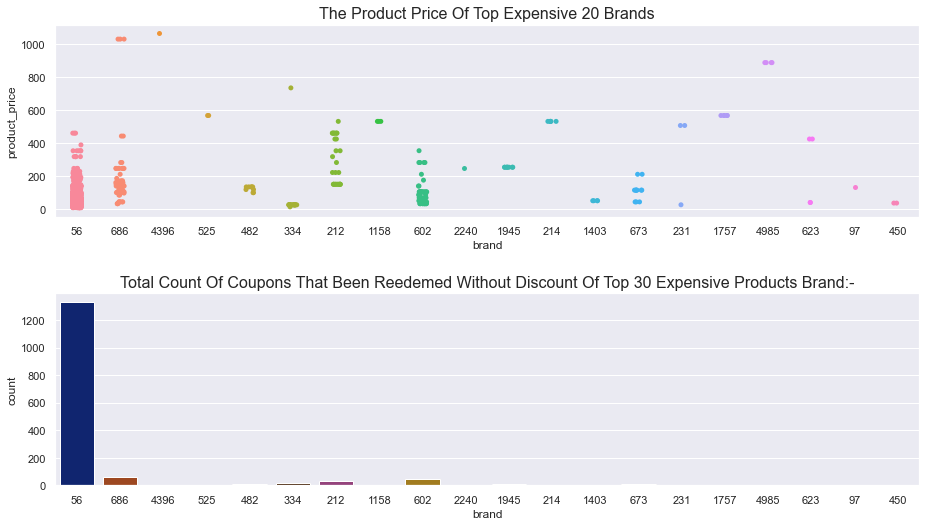

In [204]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.subplot(2,1,1)
sns.stripplot(data=df_top_30,x='brand',y='product_price',dodge=True)
plt.title("the product price of top expensive 20 brands".title(),size=16)
plt.subplot(2,1,2)
sns.countplot(data=df_top_30,x='brand',palette='dark')
plt.title("total count of coupons that been reedemed without discount of top 30 expensive products brand:-".title(),size=16)

#### Q27- <font color='red'> Show the total discounts happened for each brand[show the top 20]

In [205]:
print("top twenty total discounts for each brand:-".title())
df.groupby(by='brand').sum()['coupon_discount'].sort_values(ascending=True).head(20)

Top Twenty Total Discounts For Each Brand:-


brand
686    -59330.56
864    -17507.23
482    -15174.12
487    -13232.48
1319   -11861.46
89     -10329.80
673    -10027.03
1337    -8527.55
97      -8406.32
1088    -8185.26
1567    -7836.40
2088    -6411.60
1041    -5912.92
233     -5271.76
57      -5199.77
235     -4789.26
971     -4488.12
611     -4487.70
1140    -4307.37
2282    -4025.06
Name: coupon_discount, dtype: float64

In [206]:
idx=df.groupby(by='brand').sum()['coupon_discount'].sort_values(ascending=True).head(20).index
idx

Index(['686', '864', '482', '487', '1319', '89', '673', '1337', '97', '1088',
       '1567', '2088', '1041', '233', '57', '235', '971', '611', '1140',
       '2282'],
      dtype='object', name='brand')

In [207]:
df_total_discounts=df[df['brand'].isin(idx)]
df_total_discounts

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,...,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price,season
62,62,2,13,116,48,0,36-45,0,2,3,...,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.51,Spring
65,65,6959,13,992,48,0,36-45,0,2,3,...,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.51,Spring
68,68,8549,13,150,48,0,36-45,0,2,3,...,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.51,Spring
71,71,23391,13,888,48,0,36-45,0,2,3,...,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.51,Spring
74,74,29651,13,601,48,0,36-45,0,2,3,...,Established,Pharmaceutical,1,1.54,2012,Mar,16,Low,968.51,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382160,387606,107454,26,605,606,0,18-25,0,1,1,...,Established,Grocery,1,1.31,2012,Apr,25,Low-Lower,163.49,Spring
382164,387610,117120,26,1019,606,0,18-25,0,1,1,...,Established,Grocery,1,1.31,2013,Jan,22,Low-Lower,28.14,Winter
382165,387611,117120,26,1019,606,0,18-25,0,1,1,...,Established,Grocery,1,1.31,2012,Apr,25,Low-Lower,163.49,Spring
382169,387615,125590,26,328,606,0,18-25,0,1,1,...,Established,Grocery,1,1.31,2013,Jan,22,Low-Lower,28.14,Winter


Text(0.5, 1.0, 'Top Twenty Brand And Total Discounts')

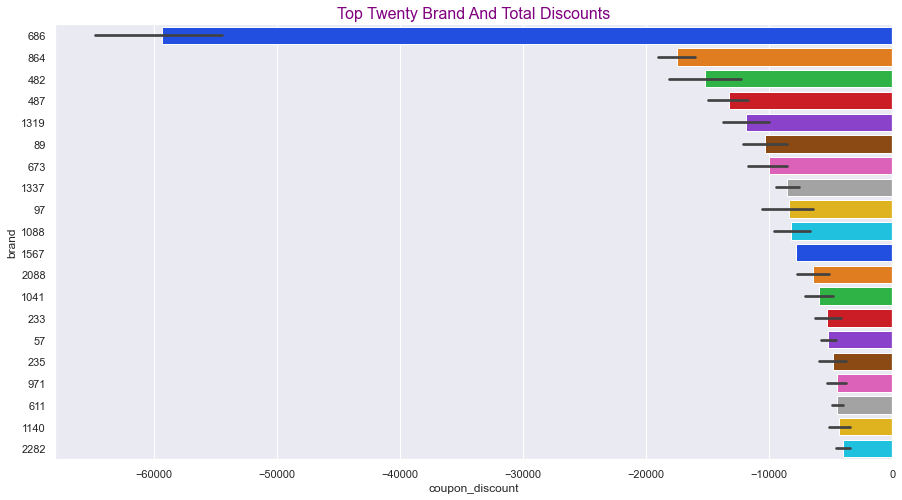

In [208]:
sns.barplot(data=df_total_discounts,x='coupon_discount',y='brand',estimator=sum,order=idx,palette='bright')
plt.title("Top Twenty brand and Total Discounts".title(),size=16,c='purple')

#### Q28- <font color='red'> Find the brand,brand category, coupon discounts-> for maximum coupon discounts.

In [209]:
##data frame of maximum discount 
df_maximum_coupon_discount=df[df['coupon_discount']==df['coupon_discount'].min()]
df_maximum_coupon_discount[['brand','category','coupon_discount']].value_counts()

brand  category        coupon_discount
686    Pharmaceutical  -249.34            82
dtype: int64

C:\Users\ymahm\.conda\envs\Epsilon_mahmoud\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Maximum Discount For Brands')

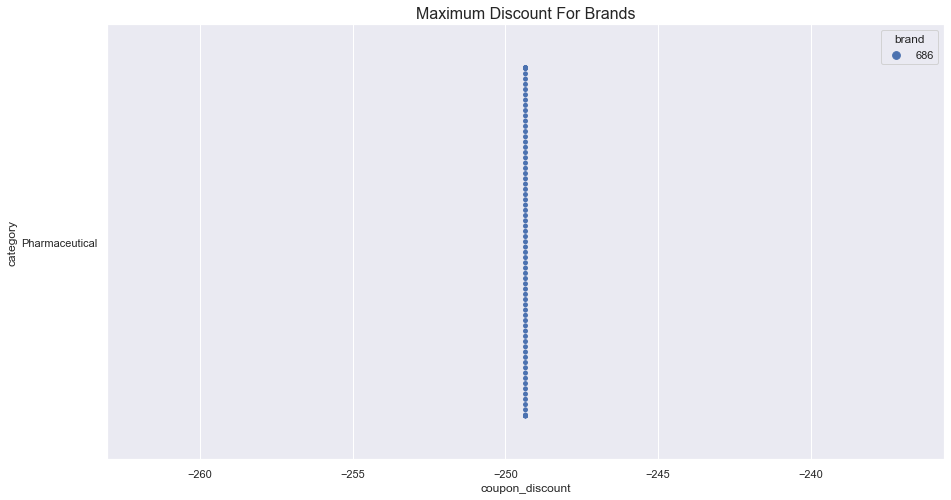

In [210]:
sns.swarmplot(data=df_maximum_coupon_discount,hue='brand',x='coupon_discount',y='category')
plt.title("maximum Discount for brands".title(),size=16)
##we can see only Pharmaceutical category has the maximum discount coupon offer

#### Q29- <font color='red'> Find the data of coupons that reedmed more than one time 

In [212]:
d=df[df['redemption_status']==1].groupby(by=['customer_id','coupon_id','brand','date']).sum()['dummy'].sort_values(ascending=False).head(15)

In [213]:
print("coupons reedemed more than one time:-".title())
d

Coupons Reedemed More Than One Time:-


customer_id  coupon_id  brand  date      
235          754        487    2012-09-28    6
             705        487    2012-09-28    4
1115         906        619    2012-07-20    4
1408         754        56     2012-03-20    4
235          754        2025   2012-11-12    3
                        823    2012-08-28    3
627          586        56     2012-03-23    3
             465        56     2012-03-23    3
             1025       56     2012-03-23    3
891          754        877    2012-03-06    3
                        56     2012-04-09    3
                        350    2012-03-22    3
                        1134   2013-02-25    3
                        1088   2013-02-06    3
235          754        986    2013-05-15    3
Name: dummy, dtype: int64

In [214]:
brand_list=[]
coupon_list=[]
customer_list=[]
date_list=[]
for customer,coupon,brand,date in d.index:
    brand_list.append(brand)
    coupon_list.append(coupon)
    customer_list.append(customer)
    date_list.append(date)
print(customer_list, "---- ",  coupon_list,  " ----- ", brand_list," ----- ", date_list)

['235', '235', '1115', '1408', '235', '235', '627', '627', '627', '891', '891', '891', '891', '891', '235'] ----  ['754', '705', '906', '754', '754', '754', '586', '465', '1025', '754', '754', '754', '754', '754', '754']  -----  ['487', '487', '619', '56', '2025', '823', '56', '56', '56', '877', '56', '350', '1134', '1088', '986']  -----  [Timestamp('2012-09-28 00:00:00'), Timestamp('2012-09-28 00:00:00'), Timestamp('2012-07-20 00:00:00'), Timestamp('2012-03-20 00:00:00'), Timestamp('2012-11-12 00:00:00'), Timestamp('2012-08-28 00:00:00'), Timestamp('2012-03-23 00:00:00'), Timestamp('2012-03-23 00:00:00'), Timestamp('2012-03-23 00:00:00'), Timestamp('2012-03-06 00:00:00'), Timestamp('2012-04-09 00:00:00'), Timestamp('2012-03-22 00:00:00'), Timestamp('2013-02-25 00:00:00'), Timestamp('2013-02-06 00:00:00'), Timestamp('2013-05-15 00:00:00')]


In [215]:
df_q29=df_reedmed[(df_reedmed['brand'].isin(brand_list))
                  &(df_reedmed['customer_id'].isin(customer_list))
                  &(df_reedmed['coupon_id'].isin(coupon_list))
                  &(df_reedmed['date'].isin(date_list))]
df_q29

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,income_bracket,...,brand_type,category,dummy,duration_of_campagin,year,month,day,income_level,product_price,season
182750,185341,61989,13,754,1408,1,26-35,0,1,9,...,Local,Grocery,1,1.54,2012,Mar,20,Middle_upper,28.14,Spring
182759,185350,61989,13,754,1408,1,26-35,0,1,9,...,Local,Grocery,1,1.54,2012,Mar,20,Middle_upper,95.82,Spring
183556,186209,20160,30,754,1408,1,26-35,0,1,9,...,Local,Grocery,1,1.51,2012,Mar,20,Middle_upper,28.14,Spring
183565,186218,20160,30,754,1408,1,26-35,0,1,9,...,Local,Grocery,1,1.51,2012,Mar,20,Middle_upper,95.82,Spring
223748,227197,73384,8,906,1115,1,46-55,0,2,3,...,Established,Pharmaceutical,1,1.58,2012,Jul,20,Low,8.90,Summer
223750,227199,73384,8,906,1115,1,46-55,0,2,3,...,Established,Pharmaceutical,1,1.58,2012,Jul,20,Low,8.90,Summer
223814,227263,81601,8,906,1115,1,46-55,0,2,3,...,Established,Pharmaceutical,1,1.58,2012,Jul,20,Low,8.90,Summer
223816,227265,81601,8,906,1115,1,46-55,0,2,3,...,Established,Pharmaceutical,1,1.58,2012,Jul,20,Low,8.90,Summer
236108,239672,4805,13,465,627,1,46-55,0,4,4,...,Local,Grocery,1,1.54,2012,Mar,23,Low,124.31,Spring
236119,239683,4805,13,465,627,1,46-55,0,4,4,...,Local,Grocery,1,1.54,2012,Mar,23,Low,45.95,Spring


In [216]:
print("coupons reedemed more than one time:-".title())
pd.pivot_table(data=df_q29,index=['customer_id','coupon_id','date'],columns='brand',values='dummy',aggfunc=sum)

Coupons Reedemed More Than One Time:-


brand                             1088  1134  2025  350  487   56  619  823  \
customer_id coupon_id date                                                    
1115        906       2012-07-20   NaN   NaN   NaN  NaN  NaN  NaN  4.0  NaN   
1408        754       2012-03-20   NaN   NaN   NaN  NaN  NaN  4.0  NaN  NaN   
235         705       2012-08-28   NaN   NaN   NaN  NaN  NaN  NaN  NaN  2.0   
                      2012-09-28   NaN   NaN   NaN  NaN  4.0  NaN  NaN  NaN   
                      2012-11-12   NaN   NaN   2.0  NaN  NaN  NaN  NaN  NaN   
                      2013-05-15   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
            754       2012-08-28   NaN   NaN   NaN  NaN  NaN  NaN  NaN  3.0   
                      2012-09-28   NaN   NaN   NaN  NaN  6.0  NaN  NaN  NaN   
                      2012-11-12   NaN   NaN   3.0  NaN  NaN  NaN  NaN  NaN   
                      2013-05-15   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
627         1025      2012-03-23   NaN   NaN   NaN  NaN  NaN  3.0  NaN  NaN   
            465       2012-03-23   NaN   NaN   NaN  NaN  NaN  3.0  NaN  NaN   
            586       2012-03-23   NaN   NaN   NaN  NaN  NaN  3.0  NaN  NaN   
891         754       2012-03-06   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
                      2012-03-22   NaN   NaN   NaN  3.0  NaN  NaN  NaN  NaN   
                      2012-04-09   NaN   NaN   NaN  NaN  NaN  3.0  NaN  NaN   
                      2013-02-06   3.0   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
                      2013-02-25   NaN   3.0   NaN  NaN  NaN  NaN  NaN  NaN   

brand                             877  986  
customer_id coupon_id date                  
1115        906       2012-07-20  NaN  NaN  
1408        754       2012-03-20  NaN  NaN  
235         705       2012-08-28  NaN  NaN  
                      2012-09-28  NaN  NaN  
                      2012-11-12  NaN  NaN  
                      2013-05-15  NaN  2.0  
            754       2012-08-28  NaN  NaN  
                      2012-09-28  NaN  NaN  
                      2012-11-12  NaN  NaN  
                      2013-05-15  NaN  3.0  
627         1025      2012-03-23  NaN  NaN  
            465       2012-03-23  NaN  NaN  
            586       2012-03-23  NaN  NaN  
891         754       2012-03-06  3.0  NaN  
                      2012-03-22  NaN  NaN  
                      2012-04-09  NaN  NaN  
                      2013-02-06  NaN  NaN  
                      2013-02-25  NaN  NaN

#### Q30- <font color='red'> Is there's a correlation between quantity and coupon discounts? 

In [253]:
def get_corr(x,y):
    return df_reedmed[[x,y]].corr()
def draw_corr(x,y):
    plt.subplot(1,2,1)
    sns.heatmap(get_corr(x,y), annot=True)
    plt.title(f"correlation between {x} and {y}".title(),size=16)
    plt.subplot(1,2,2)
    sns.scatterplot(data=df_reedmed,x=x ,y=y, palette='rainbow')
    plt.title(f"{x} vs {y}".title(),size=16)

In [248]:
get_corr('quantity','coupon_discount')

,quantity,coupon_discount
quantity,1.000000,-0.025014
coupon_discount,-0.025014,1.000000


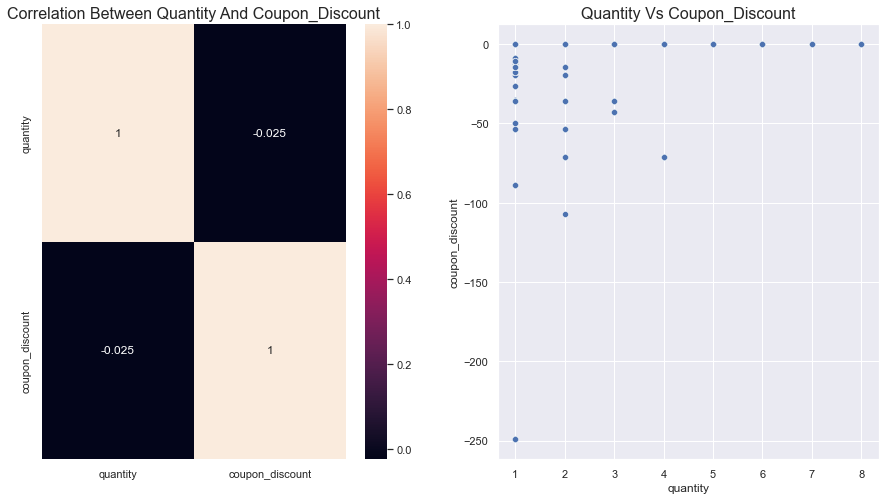

In [254]:
draw_corr('quantity','coupon_discount')

#### Q31- <font color='red'> Do the same for selling price and coupon discount

In [255]:
get_corr("coupon_discount","selling_price")

,coupon_discount,selling_price
coupon_discount,1.000000,-0.326897
selling_price,-0.326897,1.000000


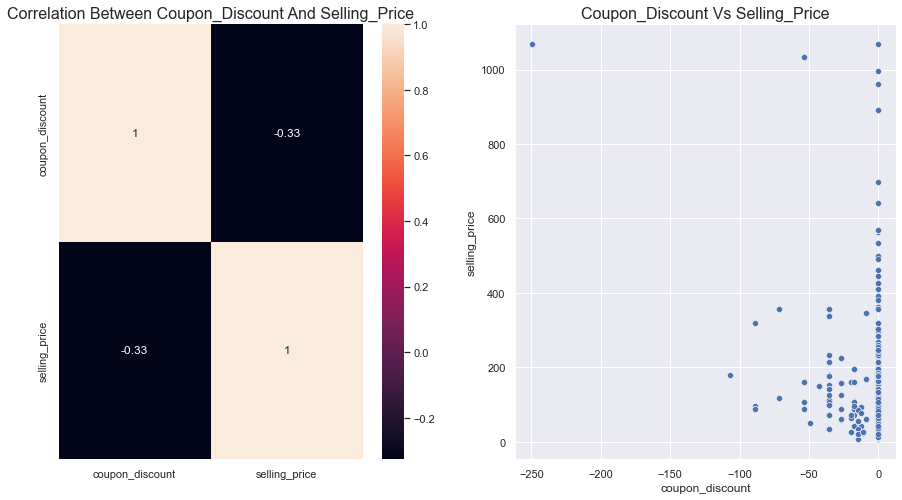

In [256]:
draw_corr("coupon_discount","selling_price")

#### Q32- <font color='red'> Find the customers income level who bought by a selling price higher than 100 for those  levels find how many coupons have been reedemed for each class do the same for all prices. Then find the total coupon discounts been spent for each class of this condition vs all prices.

In [298]:
print("the income level of who bought by a price more than 100$:-".title())
df_income_level_32=df_reedmed[(df_reedmed['selling_price']>100) & (df['coupon_discount']!=0)]
df_income_level_32['income_level'].unique()

The Income Level Of Who Bought By A Price More Than 100$:-


C:\Users\ymahm\AppData\Local\Temp\ipykernel_220\949924041.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_income_level_32=df_reedmed[(df_reedmed['selling_price']>100) & (df['coupon_discount']!=0)]


array(['Middle-Lower', 'Middle_upper', 'Low', 'Middle', 'Low-Lower'],
      dtype=object)

In [347]:
print("customers income level who bought by a selling price higher than 100$ and total reedemed coupons:-".title())
df_income_level_32['income_level'].value_counts()

Customers Income Level Who Bought By A Selling Price Higher Than 100$ And Total Reedemed Coupons:-


Middle-Lower    141
Low              36
Middle            7
Low-Lower         7
Middle_upper      4
Name: income_level, dtype: int64

In [354]:
print("customers income level and their total reedemed coupons".title())
df_reedmed['income_level'].value_counts()

Customers Income Level And Their Total Reedemed Coupons


Middle-Lower    3446
Low             1238
Low-Lower        654
Middle_upper     507
Middle           389
Name: income_level, dtype: int64

In [357]:
## Then find the total coupon discounts been spent for each class of this condition vs all prices.
print("total coupon discounts been spent for each class in which selling price >100$:-".title())
df_income_level_32.groupby(by='income_level')['coupon_discount'].sum().sort_values(ascending=True)

Total Coupon Discounts Been Spent For Each Class In Which Selling Price >100$:-


income_level
Middle-Lower   -6174.55
Low             -979.55
Low-Lower       -498.68
Middle          -302.77
Middle_upper    -231.52
Name: coupon_discount, dtype: float64

In [344]:
## Then find the total coupon discounts been spent for each class of this condition vs all prices.
print("total coupon discounts been spent for each class:-".title())
df_reedmed.groupby(by='income_level')['coupon_discount'].sum().sort_values(ascending=True)

Total Coupon Discounts Been Spent For Each Class:-


income_level
Middle-Lower   -8334.96
Low            -1726.85
Low-Lower      -1032.98
Middle          -543.21
Middle_upper    -330.54
Name: coupon_discount, dtype: float64

Text(0.5, 1.0, 'Total Coupon Discounts Spent Per Each Class')

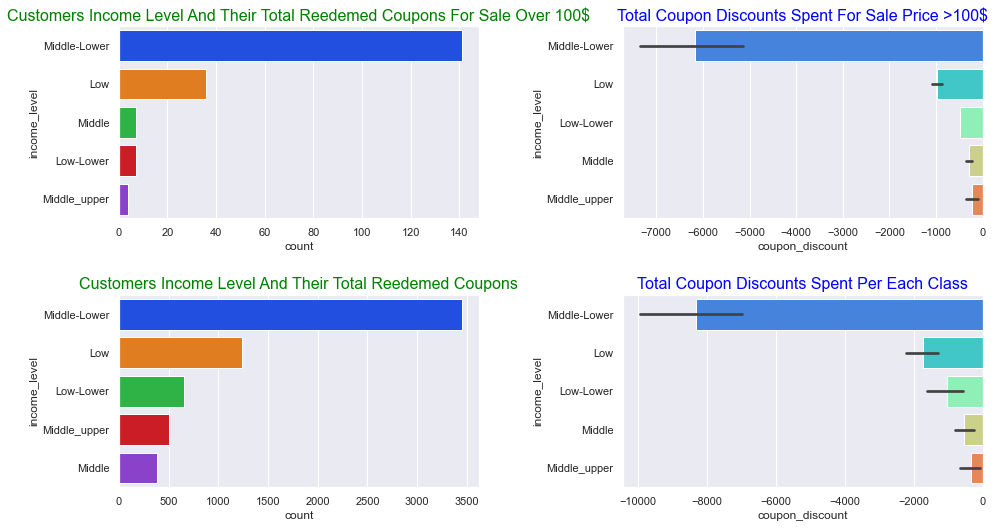

In [366]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.subplot(2,2,1)
sns.countplot(data=df_income_level_32,y='income_level',order=['Middle-Lower', 'Low', 'Middle', 'Low-Lower', 'Middle_upper'],palette='bright')
plt.title("Customers Income Level And their Total Reedemed Coupons for sale over 100$".title(),size=16,c='green')
plt.subplot(2,2,3)
sns.countplot(data=df_reedmed,y='income_level',order=['Middle-Lower', 'Low', 'Low-Lower', 'Middle_upper', 'Middle'],palette='bright')
plt.title("Customers Income Level And their Total Reedemed Coupons".title(),size=16,c='green')
plt.subplot(2,2,2)
sns.barplot(data=df_income_level_32,y='income_level',x='coupon_discount',estimator=sum,palette='rainbow',order=['Middle-Lower', 'Low', 'Low-Lower', 'Middle', 'Middle_upper'])
plt.title("Total Coupon Discounts Spent For sale Price >100$".title(),size=16,c='blue')
plt.subplot(2,2,4)
sns.barplot(data=df_reedmed,y='income_level',x='coupon_discount',estimator=sum,palette='rainbow',order=['Middle-Lower', 'Low', 'Low-Lower', 'Middle', 'Middle_upper'])
plt.title("Total Coupon Discounts Spent per each class".title(),size=16,c='blue')

## <font color='red'>Analysis  Done!